# Task 2

In [417]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from forex_python.converter import CurrencyRates

## Load Data

In [418]:
df = pd.read_csv('task2.csv')
display(df)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


## Preprocessing

delete duplicates

In [419]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
display(df)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


number of duplicates is 13972 - 8407

delete top currencies has less than 10 record

**df.drop_duplicates(inplace=True):** This line removes duplicate rows from the DataFrame df. The inplace=True parameter means that the operation is done in place, and the original DataFrame df is modified directly, without the need to assign the result to a new variable.

**df.dropna(inplace=True):** This line removes all rows that have any missing values (NaNs) in the DataFrame df. Similar to the previous operation, inplace=True indicates that the changes are made directly to df.

In [420]:
currencies = df['Salary_Currency'].value_counts()
currencies_to_keep = currencies[currencies >= 10].index
df = df[df['Salary_Currency'].isin(currencies_to_keep)]

In [421]:
cr = CurrencyRates()
currencies_to_convert = df['Salary_Currency'].unique()
usd_rates = {}
for currency in currencies_to_convert:
    usd_rates[currency] = cr.get_rate(currency, 'USD')

def convert_to_usd(amount, currency):
    return amount * usd_rates[currency]

df['Salary_USD'] = df.apply(lambda row: convert_to_usd(row['Salary'], row['Salary_Currency']), axis=1)


The code is for converting salary values from various currencies to USD (United States Dollars) using the CurrencyRates class from a currency conversion library ( forex-python). Here’s a breakdown of what each part of the code does:

**cr = CurrencyRates():** This line creates an instance of the CurrencyRates class, which will be used to get the exchange rates.


**currencies_to_convert = df['Salary_Currency'].unique():** This line extracts the unique currency codes from the ‘Salary_Currency’ column of the DataFrame df and stores them in the variable currencies_to_convert.


**usd_rates = {}:** This initializes an empty dictionary usd_rates that will store the exchange rates from each currency to USD.
The for loop iterates over each unique currency in currencies_to_convert and retrieves the current exchange rate to USD using the get_rate method. It then stores this rate in the usd_rates dictionary with the currency code as the key.
convert_to_usd is a function that takes an amount and a currency code and returns the amount converted to USD. It does this by multiplying the amount by the exchange rate from usd_rates for the given currency.


**df['Salary_USD'] = df.apply(...):** This line applies the convert_to_usd function to each row of the DataFrame df. It creates a new column ‘Salary_USD’ where each salary is converted to USD. The apply method is used with axis=1 to indicate that the function should be applied to each row.

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8360 entries, 0 to 13971
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Work_Year         8360 non-null   int64  
 1   Experience_Level  8360 non-null   object 
 2   Employment_Type   8360 non-null   object 
 3   Job_Title         8360 non-null   object 
 4   Salary            8360 non-null   int64  
 5   Salary_Currency   8360 non-null   object 
 6   Remote_Ratio      8360 non-null   int64  
 7   Company_Size      8360 non-null   object 
 8   Salary_USD        8360 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 653.1+ KB


## EDA

دلیل استفاده از هر پلات

دلیل استفاده از مدین این است که outlier برای salary زیاد داریم

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def do_eda_on_variable(dataframe, column, title, horizonal=False, show_contingency_table=False, short_plot=False):
    nrows = 2
    if short_plot:
        nrows = 1
    if show_contingency_table:
        nrows = 3
        
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20, nrows*8))
    axes = axes.flatten()

    # Bar chart of column
    if horizonal:
        counts = dataframe[column].value_counts()
        ax = counts.plot(kind='barh', ax=axes[0])
        axes[0].set_ylabel(column)
        axes[0].set_xlabel('Count')
        axes[0].set_title(f'Horizontal Bar Graph of {title}')
        for i, count in enumerate(counts):
            ax.text(count, i, str(count), va='center', ha='left')
    else:
        counts = dataframe[column].value_counts()
        ax = counts.plot(kind='bar', ax=axes[0])
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Count')
        axes[0].set_title(f'Bar Graph of {title}')
        axes[0].tick_params(axis='x', rotation=0)
        for i, count in enumerate(counts):
            axes[0].text(i, count, str(count), ha='center', va='bottom')

    # Median salary by column
    median_salary_by_column = dataframe.groupby(column)['Salary_USD'].median()
    highest_paying_column_val = median_salary_by_column.sort_values(ascending=False)
    highest_paying_column_val.plot(kind='bar', ax=axes[1])
    axes[1].set_title(f'Median Salary by {title}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Salary (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    if short_plot:
        fig.tight_layout()
        plt.show()
        return

    # Box plot of salary distribution
    sns.boxplot(x=column, y='Salary_USD', data=dataframe, ax=axes[2])
    axes[2].set_title(f'Salary Distribution by {title} (Box Plot)')
    axes[2].set_xlabel(title)
    axes[2].set_ylabel('Salary (USD)')
    axes[2].tick_params(axis='x', rotation=45)

    # Violin plot of salary distribution
    sns.violinplot(x=column, y='Salary_USD', data=dataframe, ax=axes[3])
    axes[3].set_title(f'Salary Distribution by {title} (Violin Plot)')
    axes[3].set_xlabel(title)
    axes[3].set_ylabel('Salary (USD)')
    axes[3].tick_params(axis='x', rotation=45)

    if show_contingency_table:
        salary_deciles = pd.qcut(dataframe['Salary_USD'], q=10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], duplicates='drop')
        top_10_jobs = dataframe[column].value_counts().nlargest(10).index
        top_10_data = dataframe[dataframe[column].isin(top_10_jobs)]
        contingency_table = pd.crosstab(salary_deciles, top_10_data[column], normalize='index')
        job_title_totals = contingency_table.sum(axis=0)
        
        heatmap = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt=".2%", ax=axes[4], annot_kws={"fontsize": 10})
        axes[4].set_title("Heatmap: Salary Deciles vs Top 10 Job Titles (Proportions)")
        axes[4].set_xlabel("Job Titles")
        axes[4].set_ylabel("Salary Deciles")
        axes[4].set_xticklabels([f"{label} ({total:.0f})" for label, total in zip(contingency_table.columns, job_title_totals)], rotation=90)
        cbar = heatmap.figure.colorbar(heatmap.collections[0])
        cbar.ax.tick_params(labelsize=8)

        fig.tight_layout()
        plt.show()


    fig.tight_layout()
    plt.show()

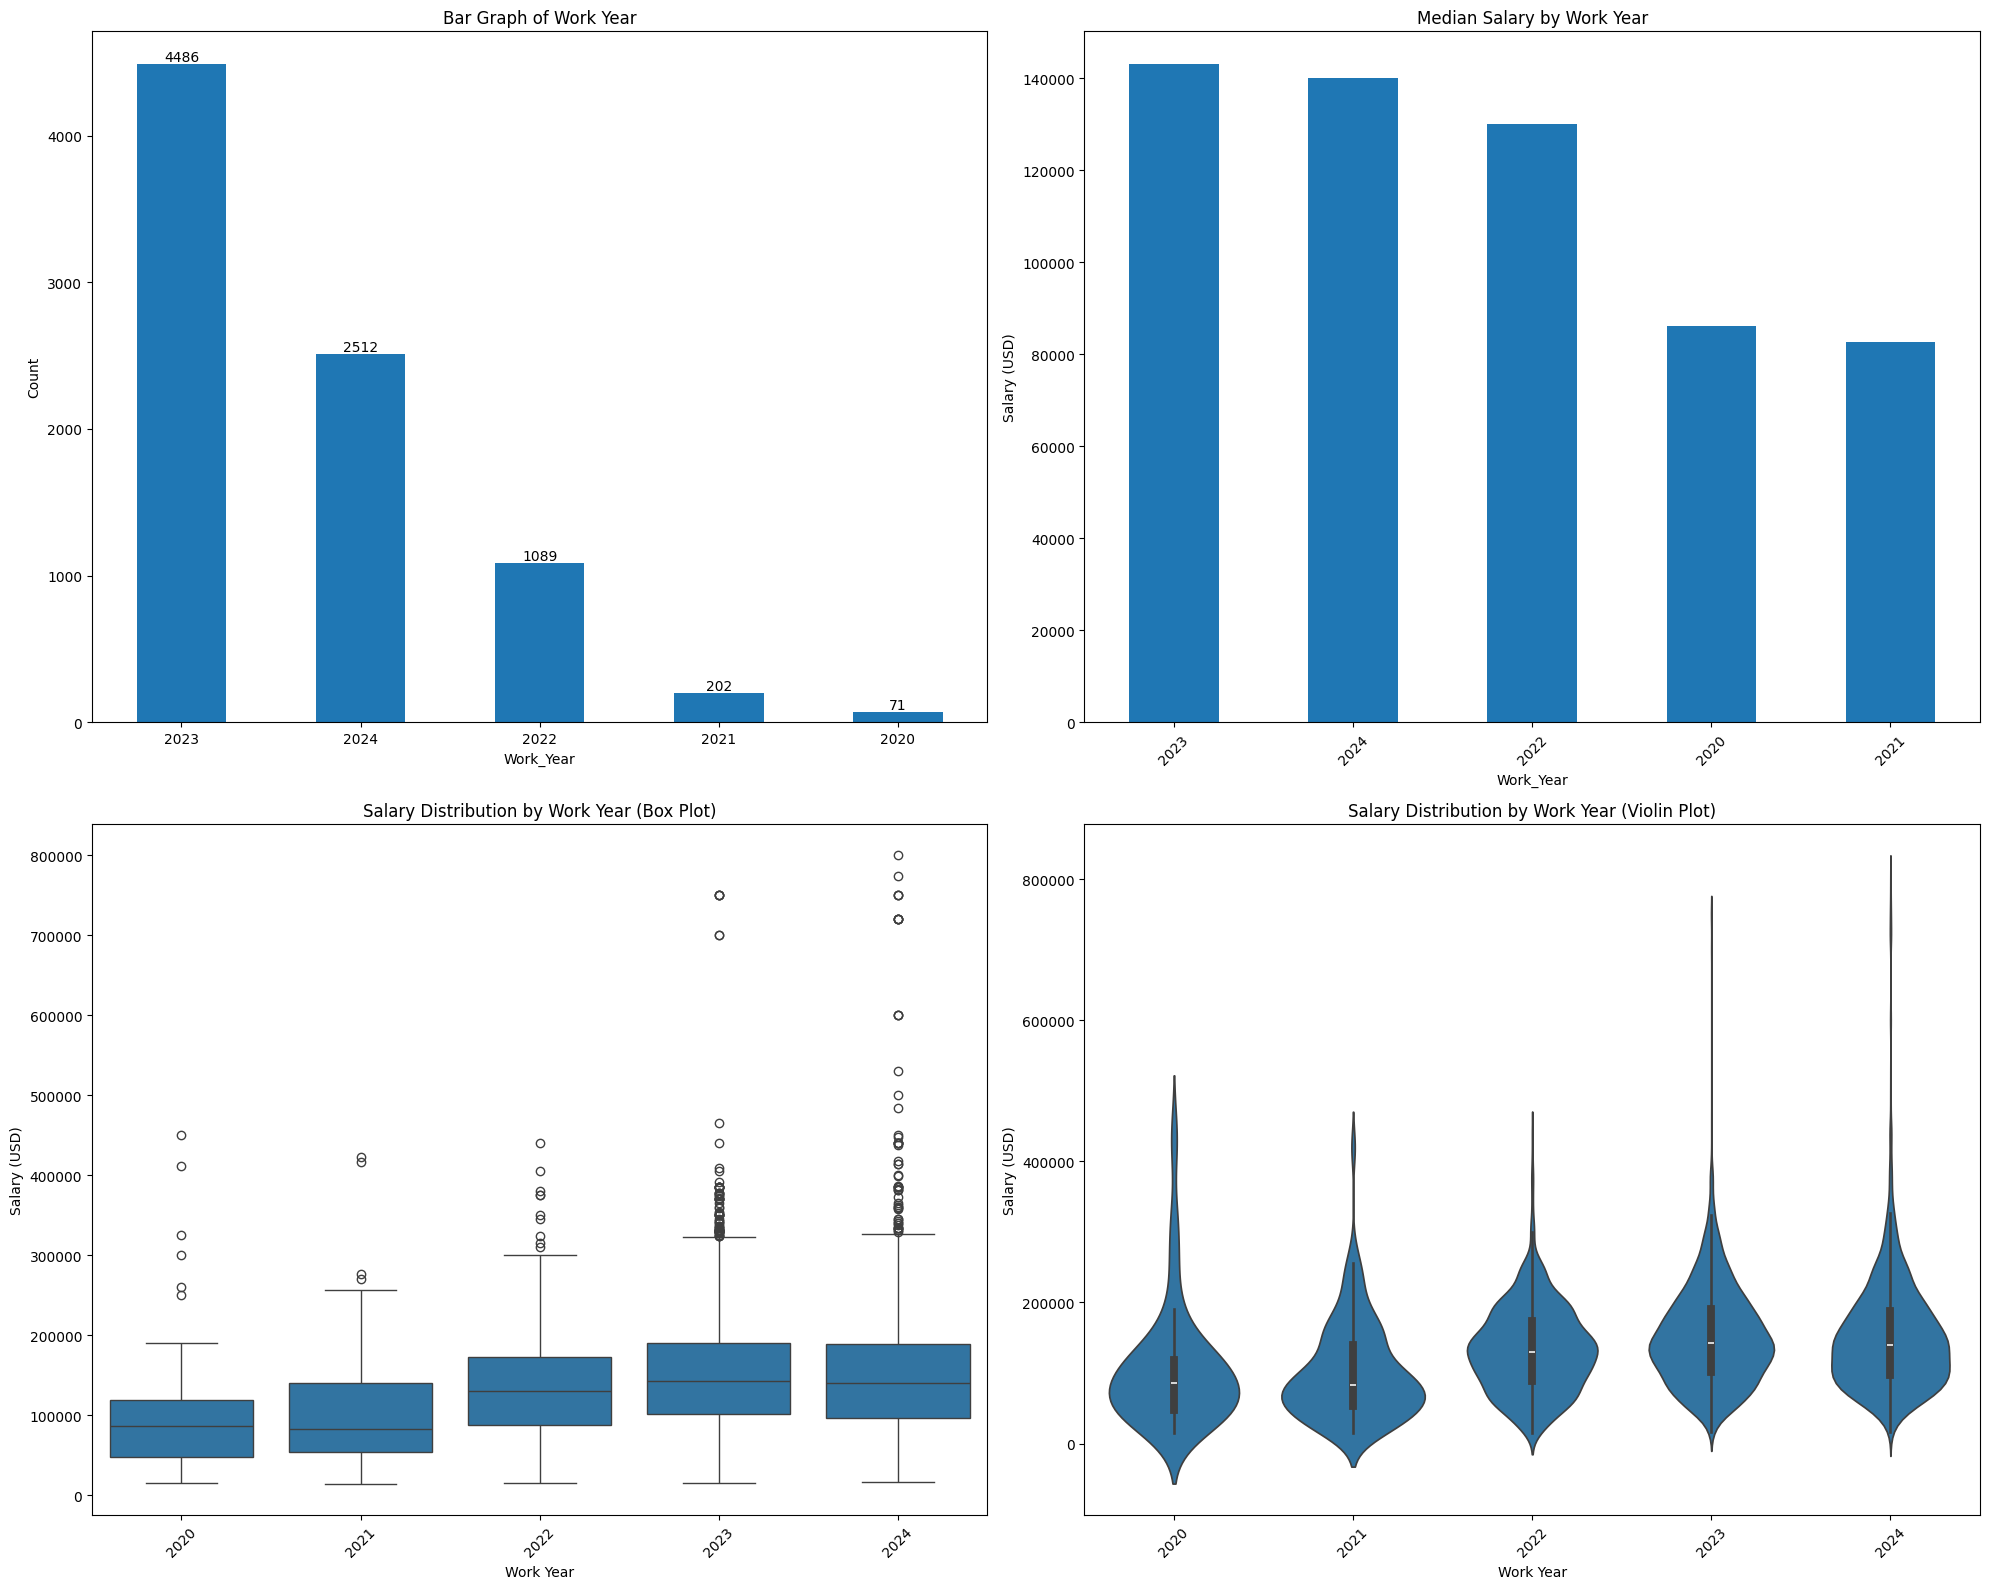

In [ ]:
do_eda_on_variable(df, 'Work_Year', 'Work Year')

**breif :** there are many people that works in 2023 and 2024 compared to other years . because of that it is obviouse to have more outliers in 2023 and 2024 . 

As we go further in years the plot shows that salaries increased .

Because of existing outliers its not preferable to use mean . because mean is significantly sensetive to outliers. so median was a good idea.

**more details:**

**Bar Graph of Work Year:** This graph shows the count of a certain dataset across different work years from 2020 to 2023. The count is highest for the year 2023, indicating a significant amount of data (or events) for that year. The counts decrease as we go back in time, with the least count for the year 2020.

**Median Salary by Work Year:** The second graph displays the median salary for each work year from 2020 to 2023. The median salary is highest in 2023, suggesting an increase in salary that year. There’s a general decreasing trend in median salary as we move from 2023 to 2021, but there’s a slight increase from 2021 to 2020.

The increase in both the count and median salary in 2023 could indicate a growth in the industry or an economic upturn leading to more jobs and higher pay or because of money inflation. The slight increase in median salary from 2021 to 2020 could suggest that, while there were fewer positions in 2020, they may have been higher-paying on average compared to 2021.

**Box Plot:** The third graph is a box plot that shows the interquartile range (IQR) of salaries for the years 1990, 1995, 2000, 2005, and 2010. The line inside each box represents the median salary for that year. The “whiskers” extend to the highest and lowest values within 1.5 times the IQR from the upper and lower quartiles, respectively. Points outside of this range are considered outliers and are plotted as individual points.

**Violin Plot:** The fourth graph is a violin plot for the same years. It combines features of the box plot with a kernel density estimation. The width of the “violin” at different levels indicates the density of data points, with wider sections representing a higher density of data points (i.e., more common salary values).

The median salary has generally increased over time from 1990 to 2010.
The range and distribution of salaries have also expanded, with more significant variations in later years.
There are notable outliers, particularly in the later years, indicating that some individuals earn significantly more than the typical range.

The overall increase in median salary and the number of data points could suggest economic growth or expansion in the job market over these years.

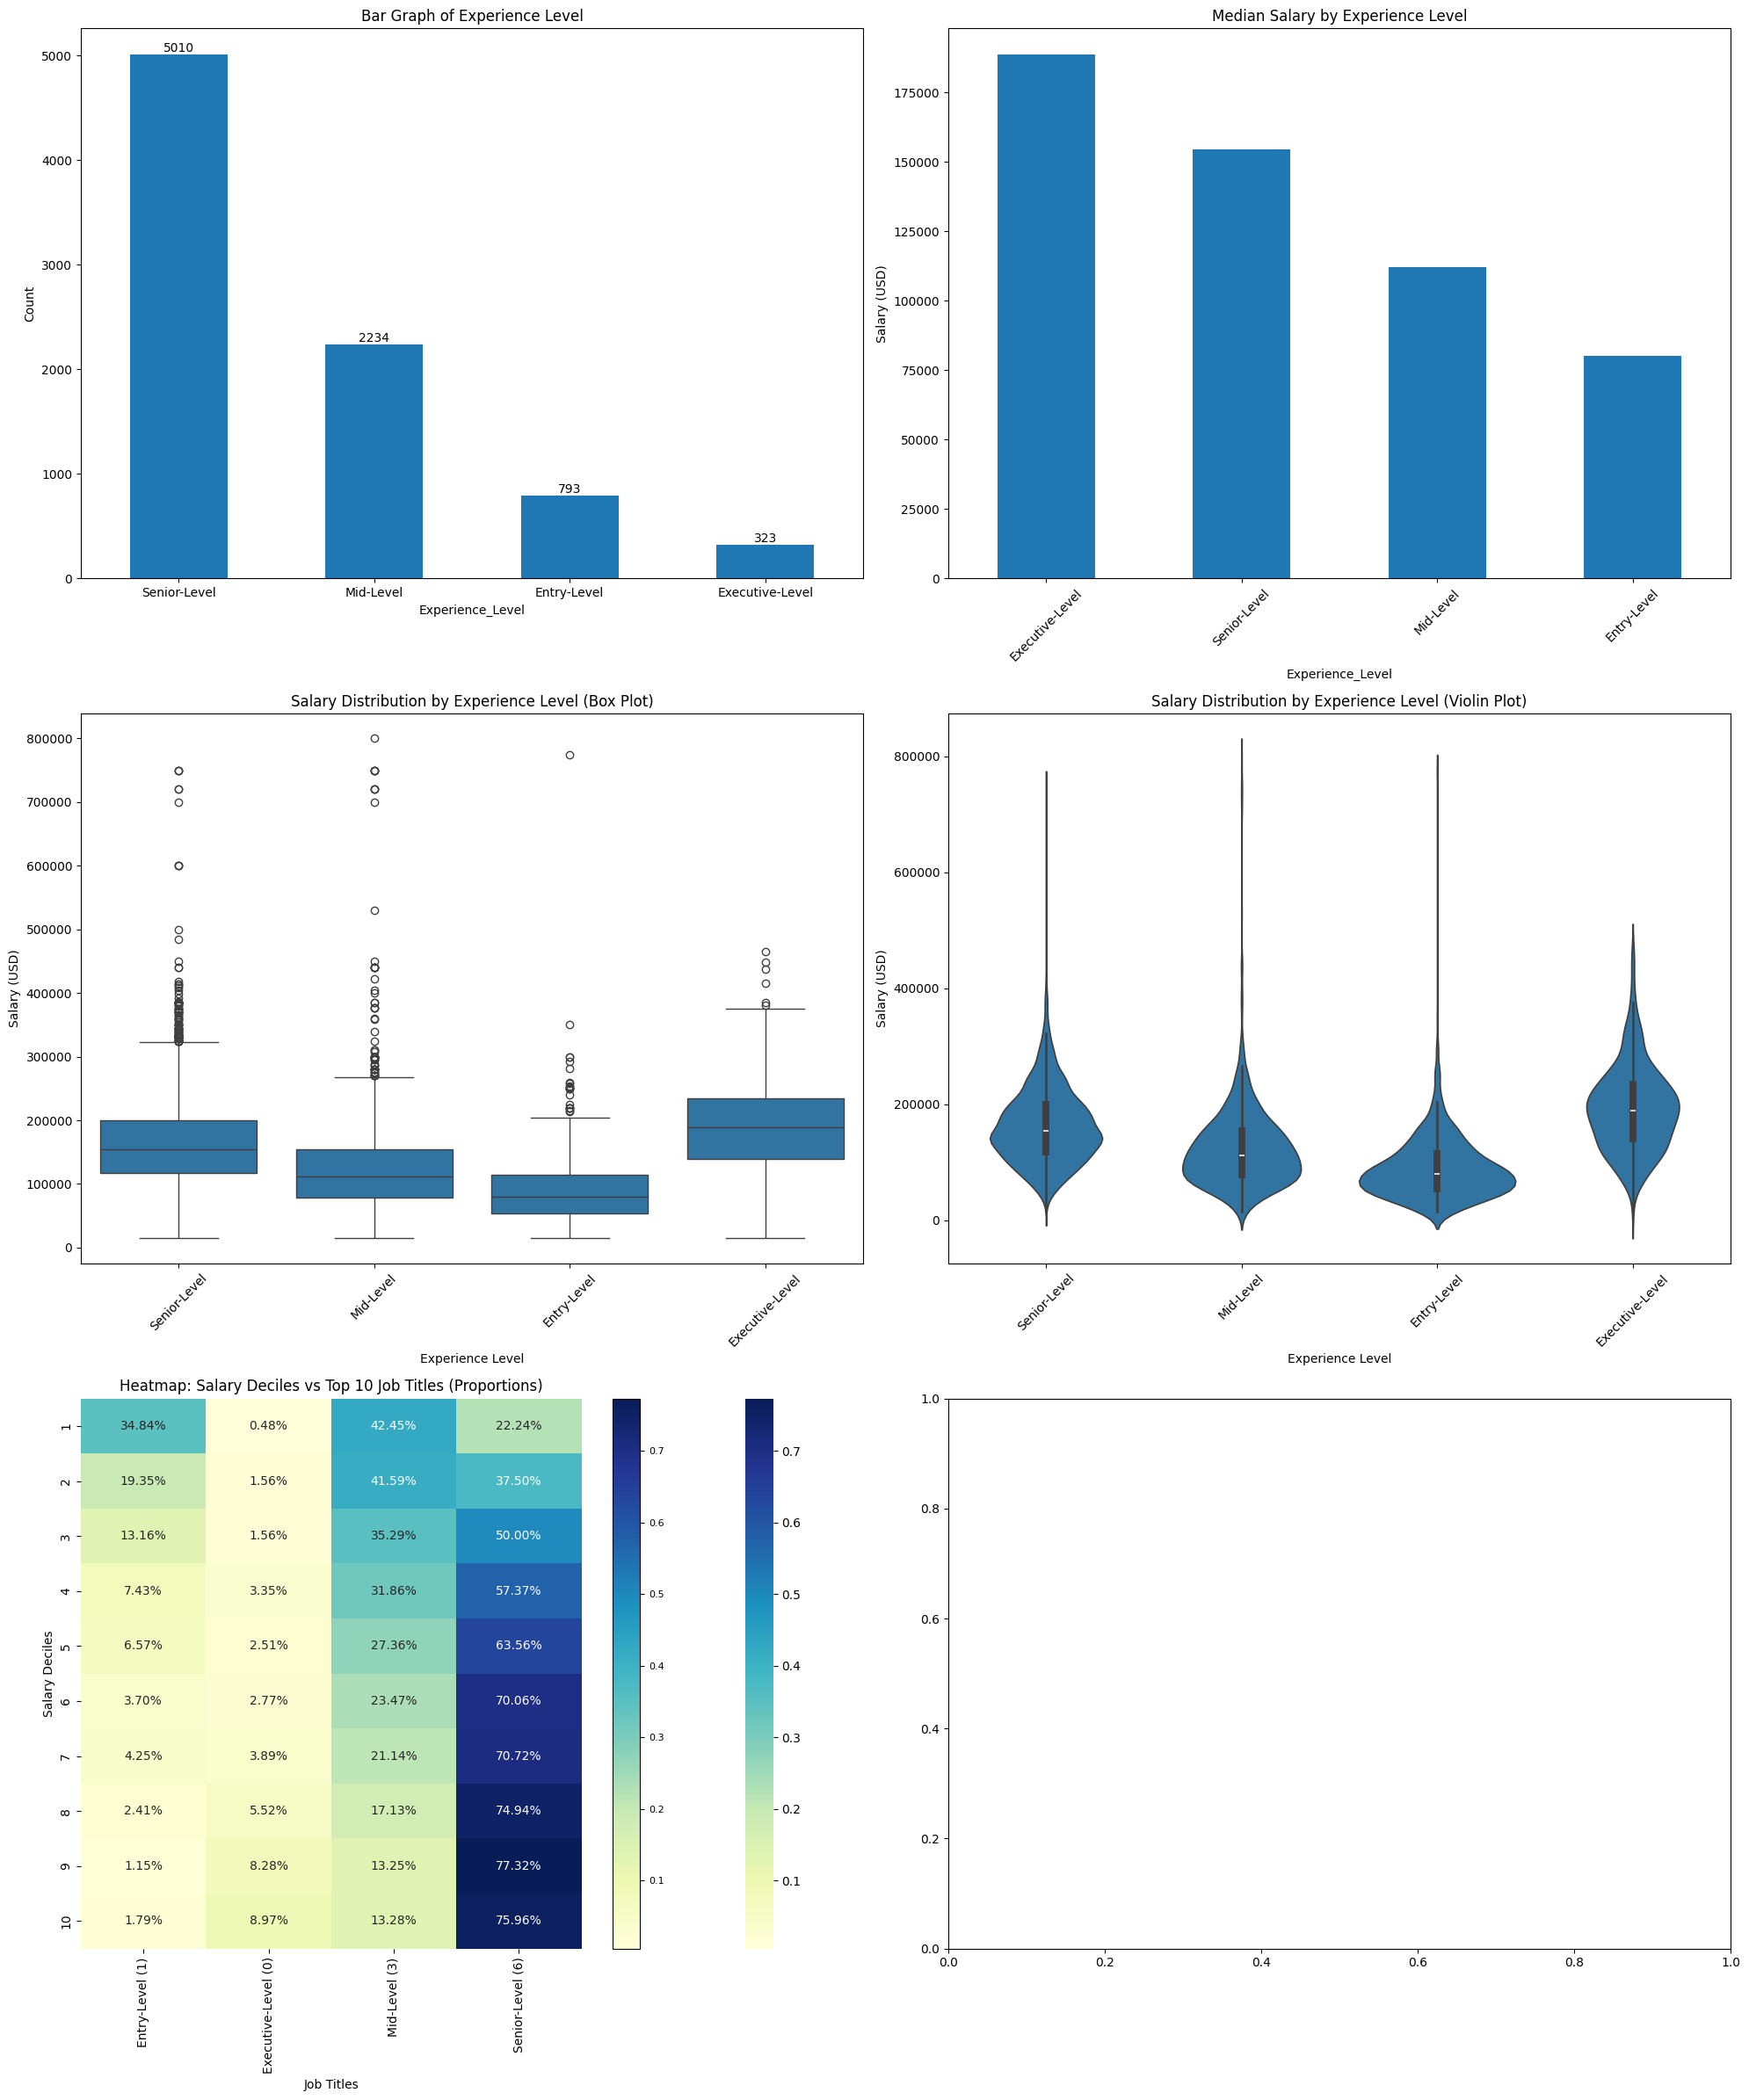

In [ ]:
do_eda_on_variable(df, 'Experience_Level', 'Experience Level', show_contingency_table=True)

**breif**: the count of seniors are more than others . it is the reason having outliers in this group . so totaly we can undrestand the more the count of data , the more in outliers . 

from heatmap we can undrestand , seniors get more salaries than others. and entry_level groups has the least salary. 

**more details:** 

**Bar Graph of Experience Level:** This graph shows the number of individuals at different experience levels. The experience levels are categorized as Senior-Level, Mid-Level, Entry-Level, and Executive-Level. The Senior-Level has the highest count, suggesting that there are more individuals with this level of experience. The count decreases for Mid-Level and Entry-Level, with the Executive-Level having the least count. This distribution could indicate the typical career progression path, where fewer individuals reach executive positions.

**Median Salary by Experience Level:** The second graph displays the median salaries for the same experience levels. As expected, the Executive-Level commands the highest median salary, followed by Senior-Level, Mid-Level, and Entry-Level. This graph reflects the general trend that higher experience levels correlate with higher compensation.
Combining insights from these graphs with the previous ones  we can deduce that:

There’s a progression in both the number of opportunities and the compensation levels over time.
More recent years have seen a higher count of data points and higher median salaries, possibly indicating economic growth or a booming job market.
Experience level is a significant factor in salary, with more experienced individuals earning higher median salaries.
These graphs together provide a comprehensive overview of the job market dynamics, showing how experience and time influence the number of job opportunities and the level of salaries.

**Box Plot:** This plot is a box plot that shows the salary ranges for different employment types: Full-time, Contract, Part-time, and Freelance. The central line in each box represents the median salary, the box itself shows the interquartile range (IQR), and the whiskers extend to the furthest points that are not considered outliers. Outliers are represented as individual points beyond the whiskers.

**Violin Plot:** The right plot is a violin plot for the same employment types. It shows the distribution of salaries with the width of the plot at different salary levels indicating the density of data points. The white dot represents the median salary, and the thick bar in the center of the violin indicates the IQR.

From these plots, we can infer that Full-time and Contract positions tend to have a wider range of salaries compared to Part-time and Freelance. The presence of outliers in the Full-time and Contract categories suggests that there are individuals who earn significantly more than the typical range for those employment types. The violin plot also indicates that the salary distribution for Full-time and Contract roles is more varied and skewed towards higher salaries.

Combining this information with the previous graphs you mentioned (which I assume showed counts and median salaries by work year and experience level), we can conclude that:

- Full-time and Contract roles not only have more individuals (as indicated by the counts) but also offer a broader range of salaries with the potential for higher earnings.
- Experience level and work year are likely factors that influence the distribution of salaries within these employment types, with more experienced individuals or recent years showing higher median salaries and a greater spread of salary ranges.
- These insights can help understand the dynamics of the job market, the impact of employment type on salary, and how experience and time can affect earning potential.

- The heatmap visualizes the proportions of experience levels across different salary deciles for the top 10 job titles. Here’s a detailed explanation:

X-Axis (Job Titles): The categories include Entry Level , Experienced , Mid Career , and Senior Level .
Y-Axis (Salary Deciles): These are likely divided into 10 groups from lowest to highest salaries.
Color Coding: The intensity of the color represents the proportion of individuals within each experience level for a given salary decile. Darker shades indicate higher proportions.
From the heatmap, we can infer that:

- Entry-level positions are more common in the lower salary deciles.
- As the salary decile increases, the proportion of senior-level positions increases, which is expected as more experience typically correlates with higher pay.
- Mid-career professionals are well-represented across various salary deciles, suggesting a broad salary range for individuals with 5-9 years of experience.
- The executive level, while not explicitly labeled, may be inferred to have a significant presence in the higher salary deciles.

This heatmap provides a clear visual representation of how experience levels are distributed across different salary ranges, offering insights into career progression and compensation trends.

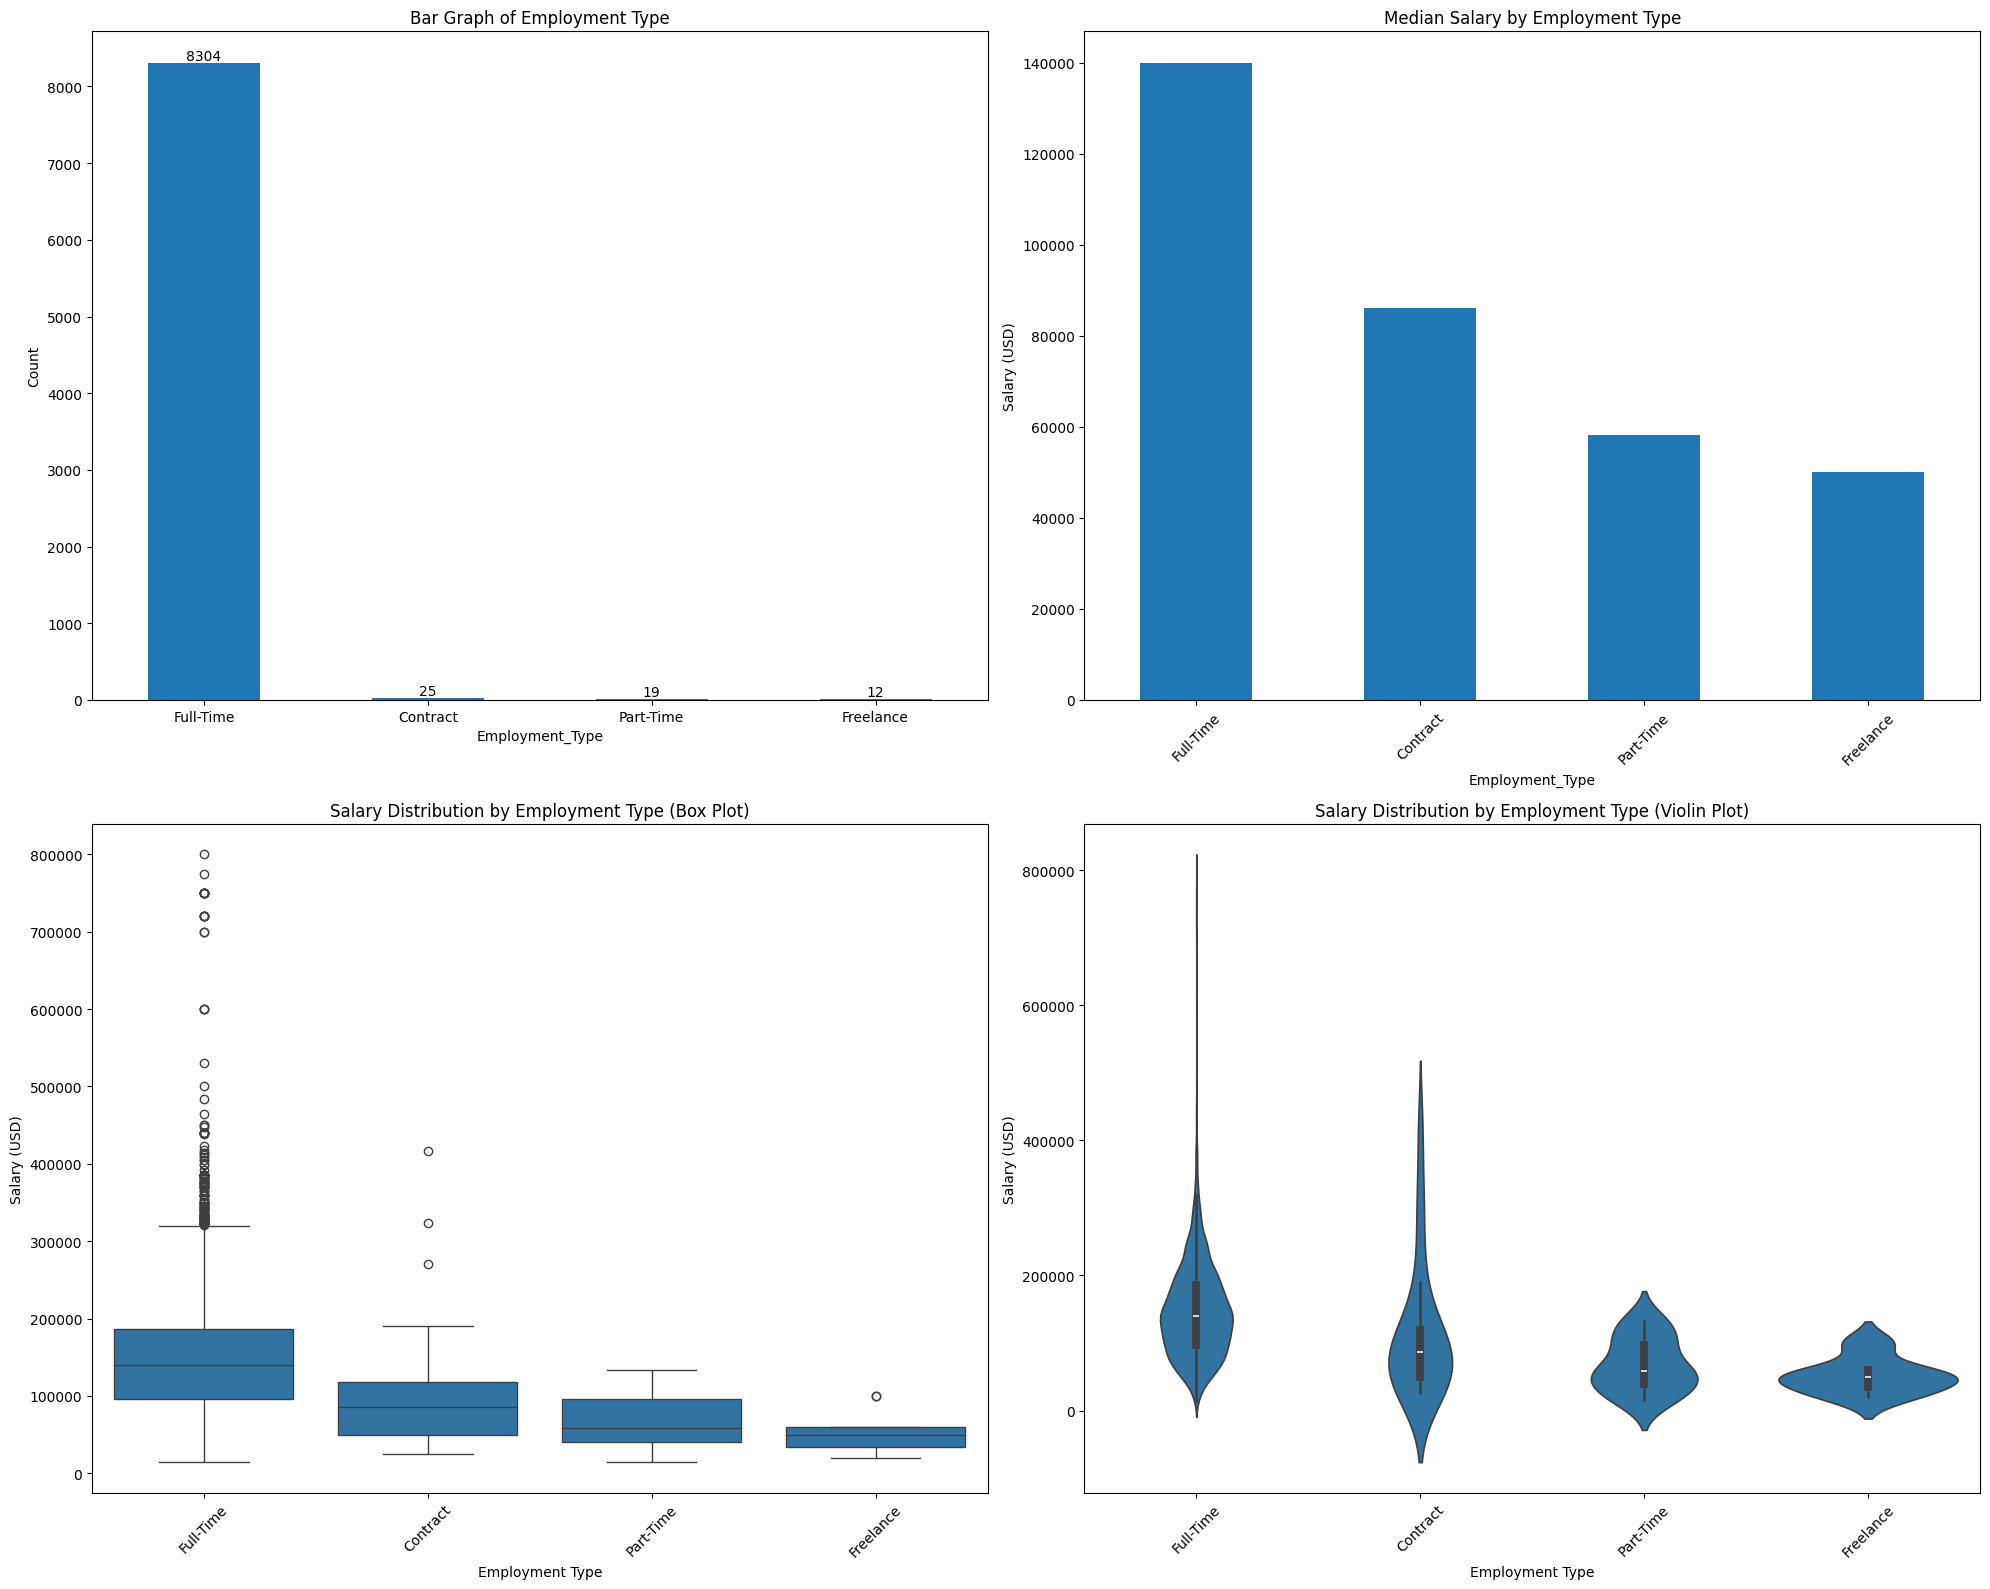

In [ ]:
do_eda_on_variable(df, 'Employment_Type', 'Employment Type')

**breif:** 
Using EDA for employment type that are mostly in 'full_time' group is not useful.

Also in second plot we can see that there are correlation with salary and the employment type. more you work , more you get!

From these plots, we can infer that Full-Time and Contract positions tend to offer higher salaries compared to Part-Time and Internship roles. The range of salaries is also broader for Full-Time positions, as indicated by the spread of the box and the width of the violin. The presence of outliers in the Full-Time category suggests that there are individuals who earn significantly more than the typical range for that employment type.

In [ ]:
top_10_jobs_df = df[df['Job_Title'].isin(list(df['Job_Title'].value_counts().sort_values(ascending=True).nlargest(10).index))]

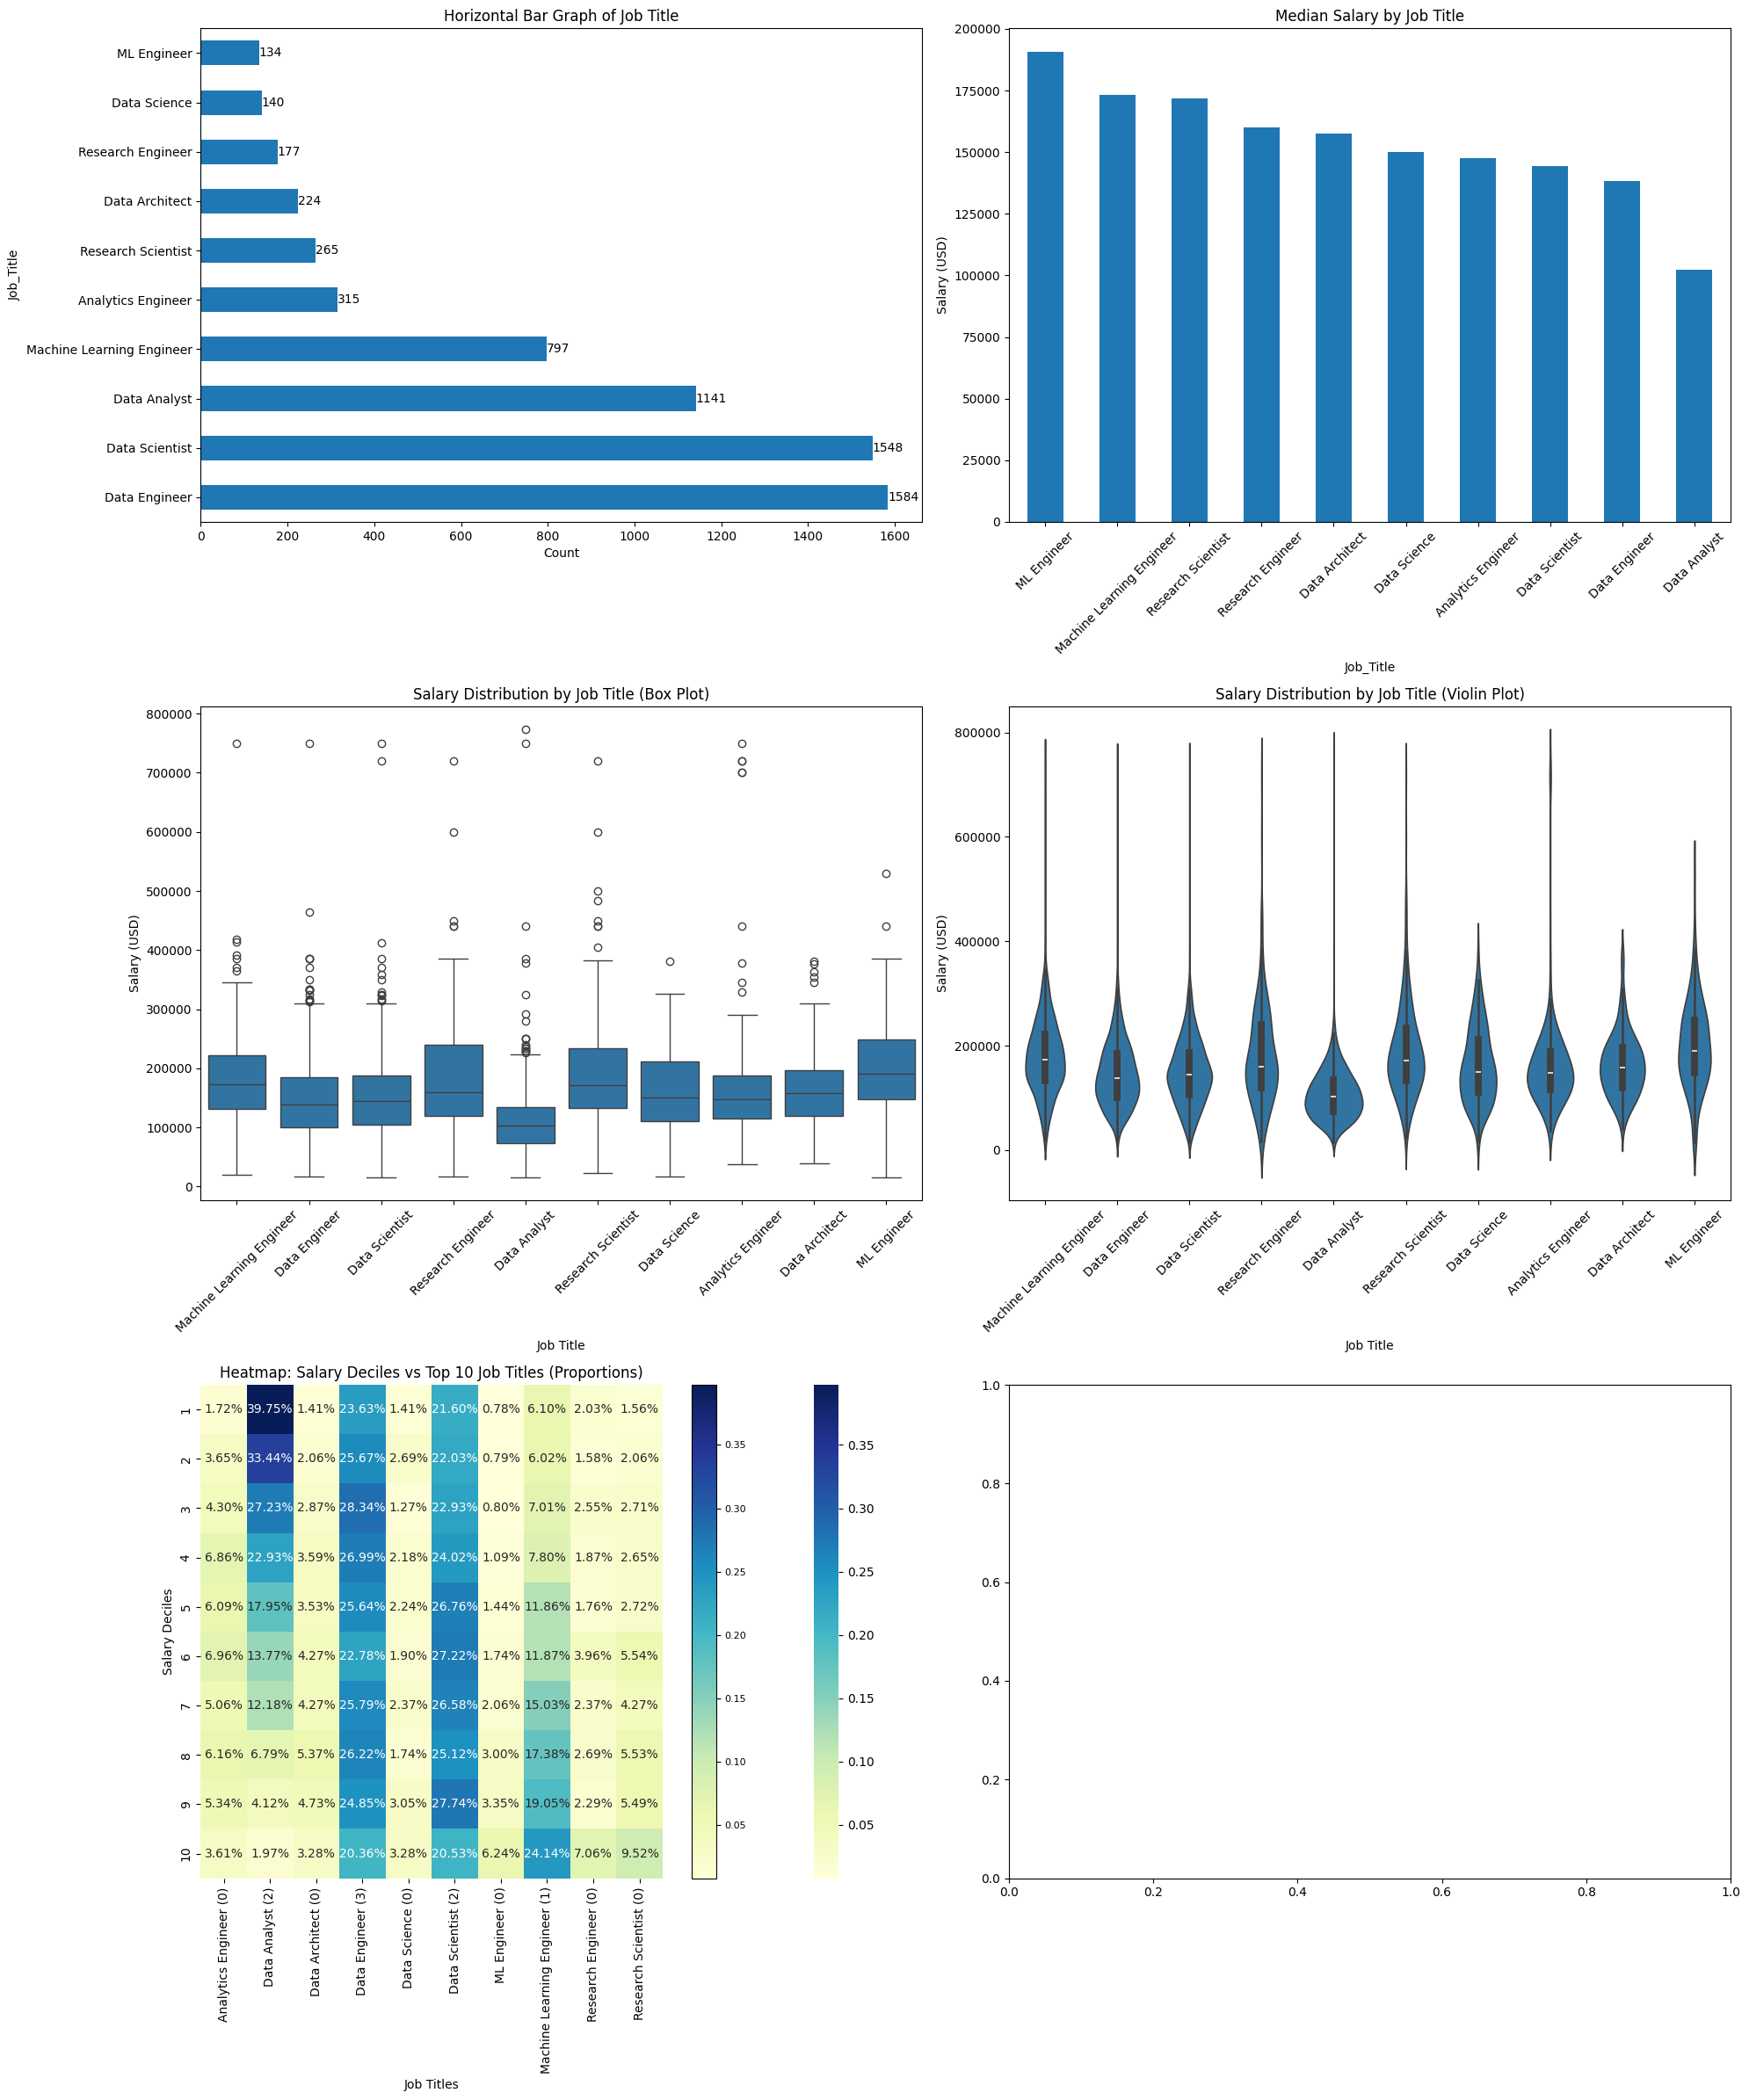

In [ ]:
do_eda_on_variable(top_10_jobs_df, 'Job_Title', 'Job Title', horizonal=True, show_contingency_table=True)

**breif**: 
Because of the large number of job titles , we just used the top 10 with highest frequencies.

In plots we can see that there count of data engineers are the most . but the salary of machine learning engineers are the most.

heatmap shows that 40% of the least salaries are for data analyst. so we can conclude that data analyst is the jop with the least salary.

even we can see that 24% of the highest salaries is for machine learninf engineers . and from the heatmap we can conclude that machine learning engineers are the most paied ones.

with violin plot we can undrestand that machine learning enginnering has wider distribution among other jobs.

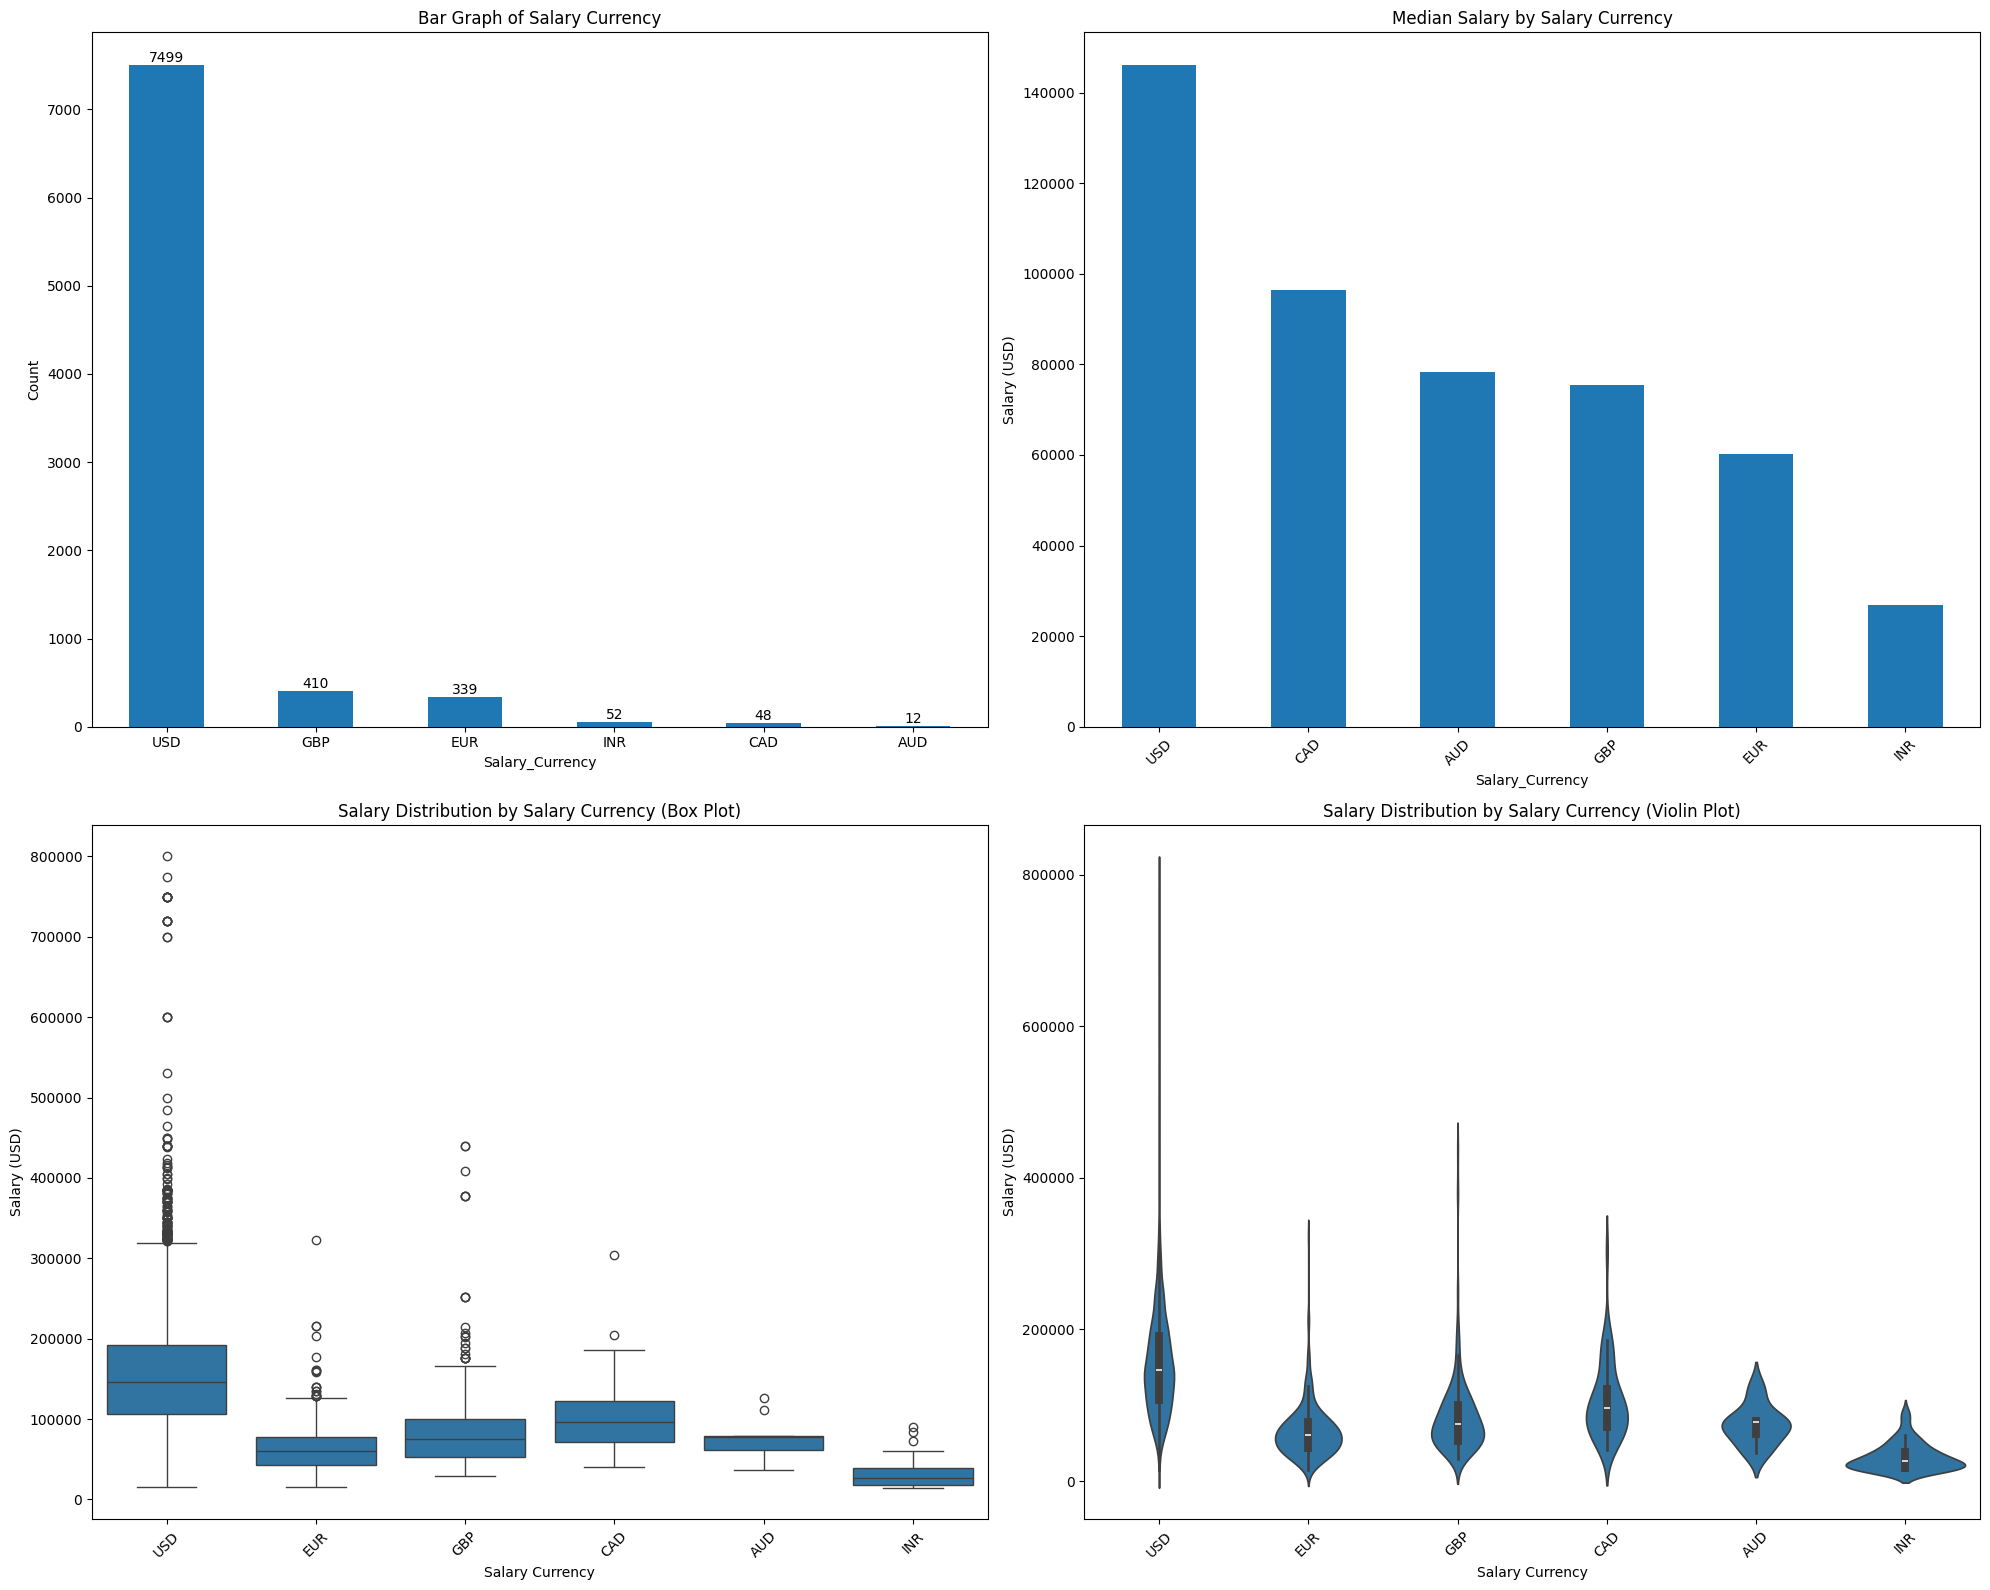

In [ ]:
do_eda_on_variable(df, 'Salary_Currency', 'Salary Currency')

we can conclude that because of the large amount of USD we have more outliers in this group .

the second plots shows that people who works with USD has higher salaries among others . and the ones who paied with INR (indea) have the least salary.

with violin plot we can undrestand there is a wide range in distribution of salary for people who work with USD.

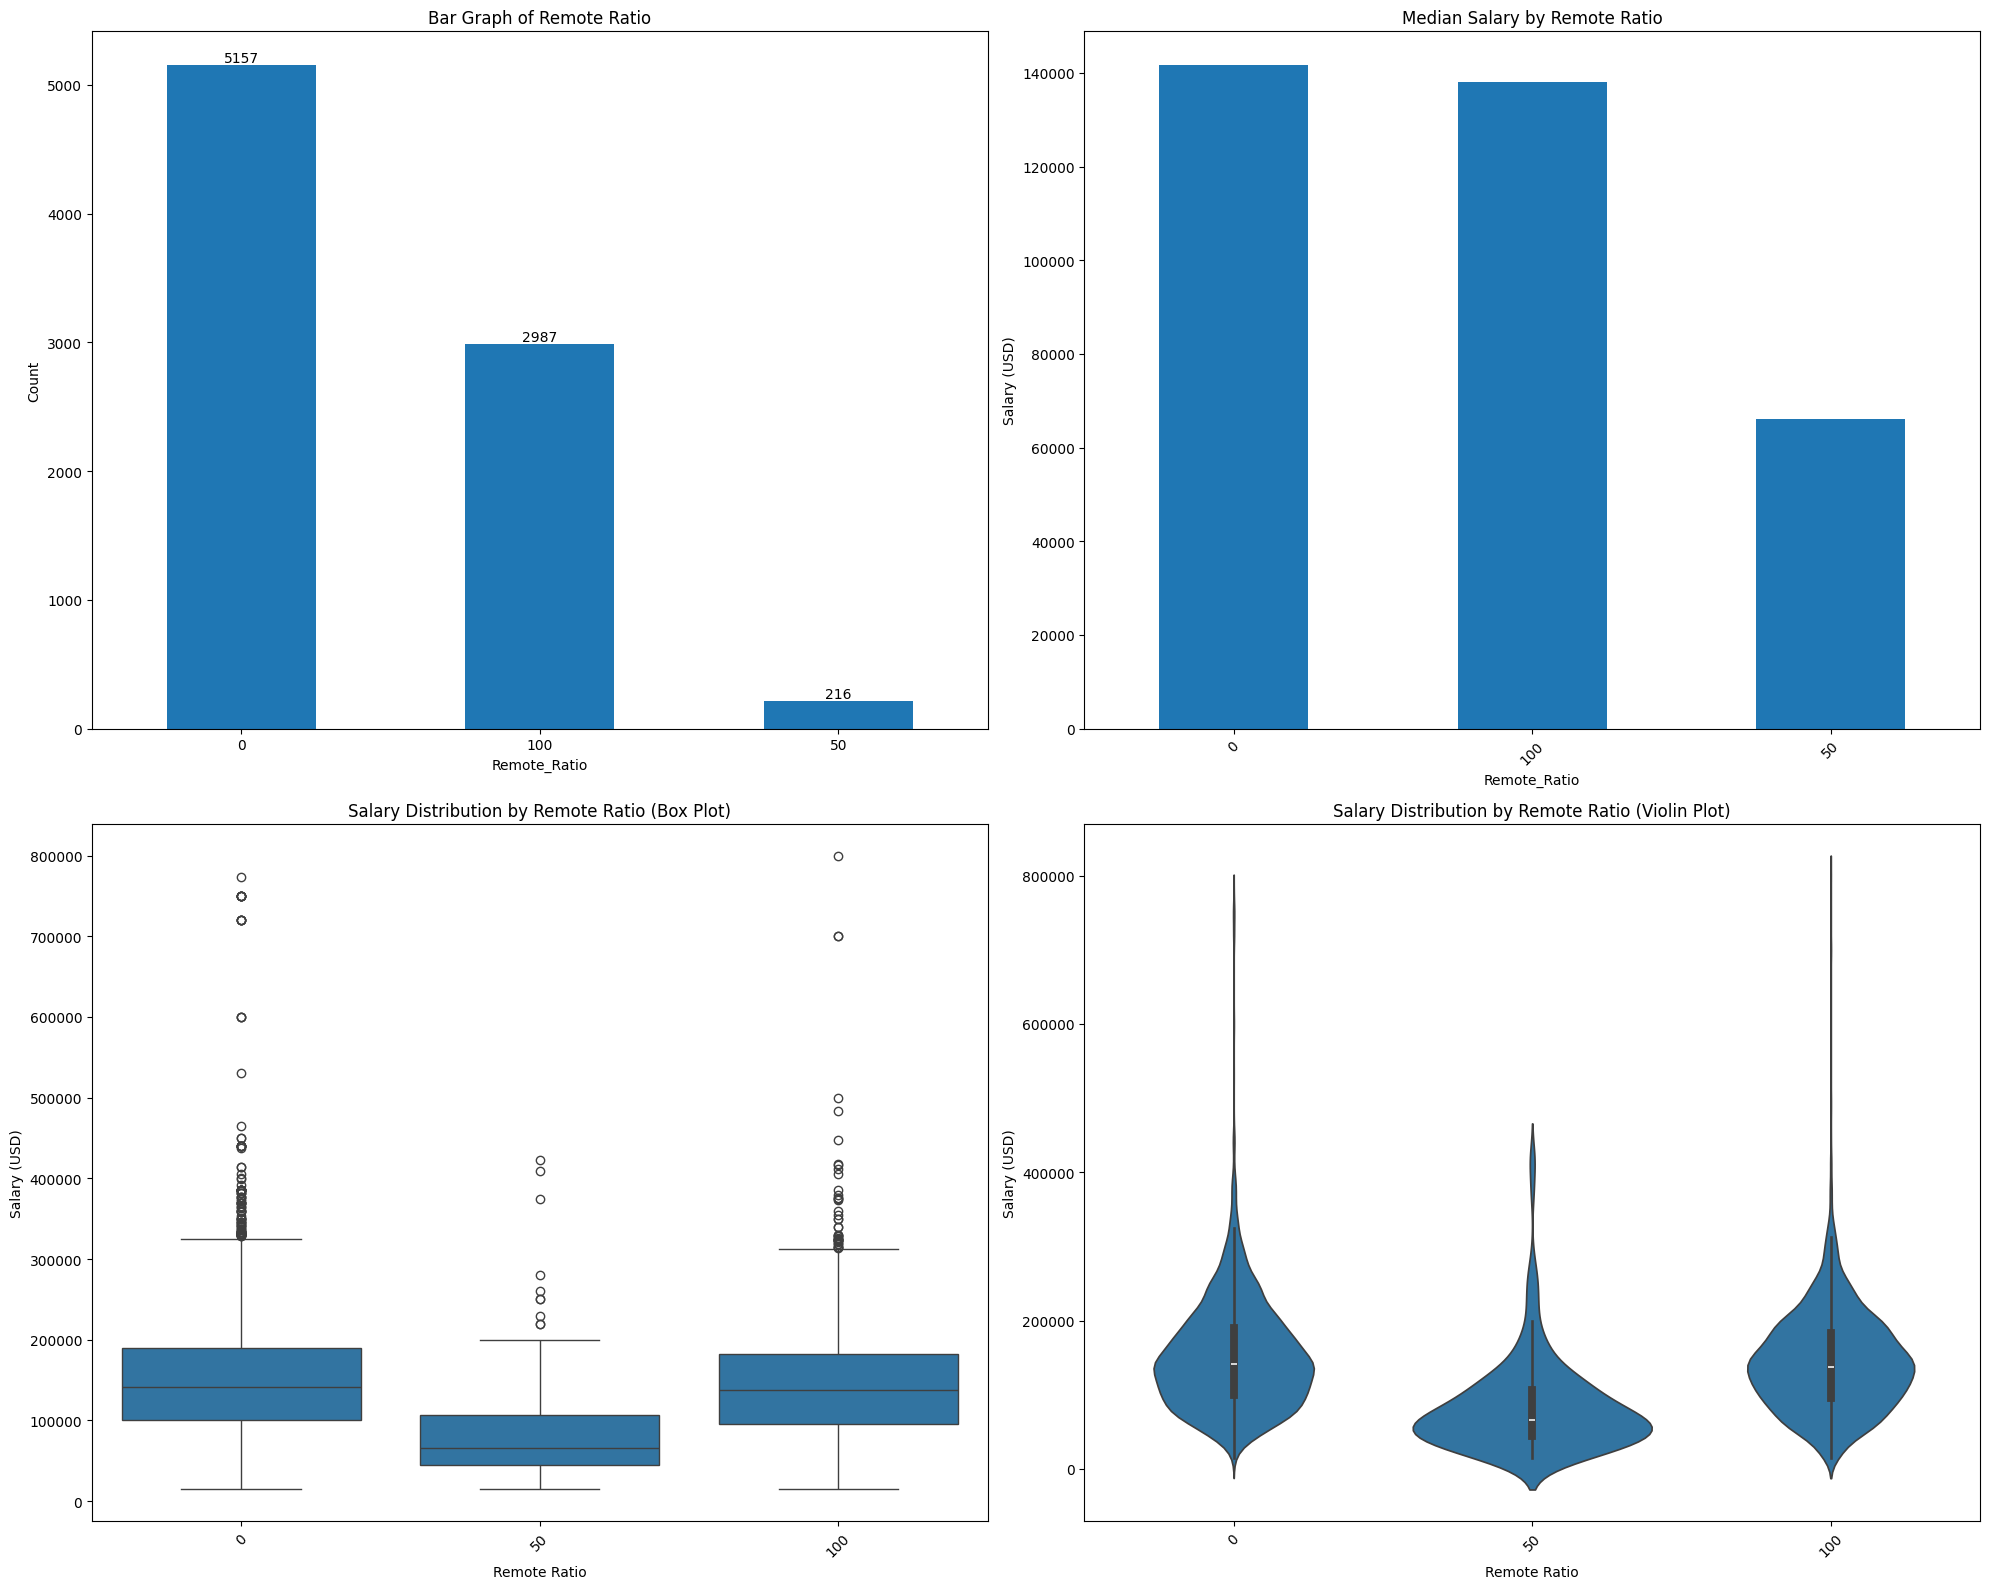

In [ ]:
do_eda_on_variable(df, 'Remote_Ratio', 'Remote Ratio')

The number of people who works hybrid is less than the other two. 

we can conclude that people who work remote and non remote has almost same salaries and the hybrid ones has the least salaries. 

with violin plot and box plot we can conclude that hybrid salaries are concentrated in a specific range.

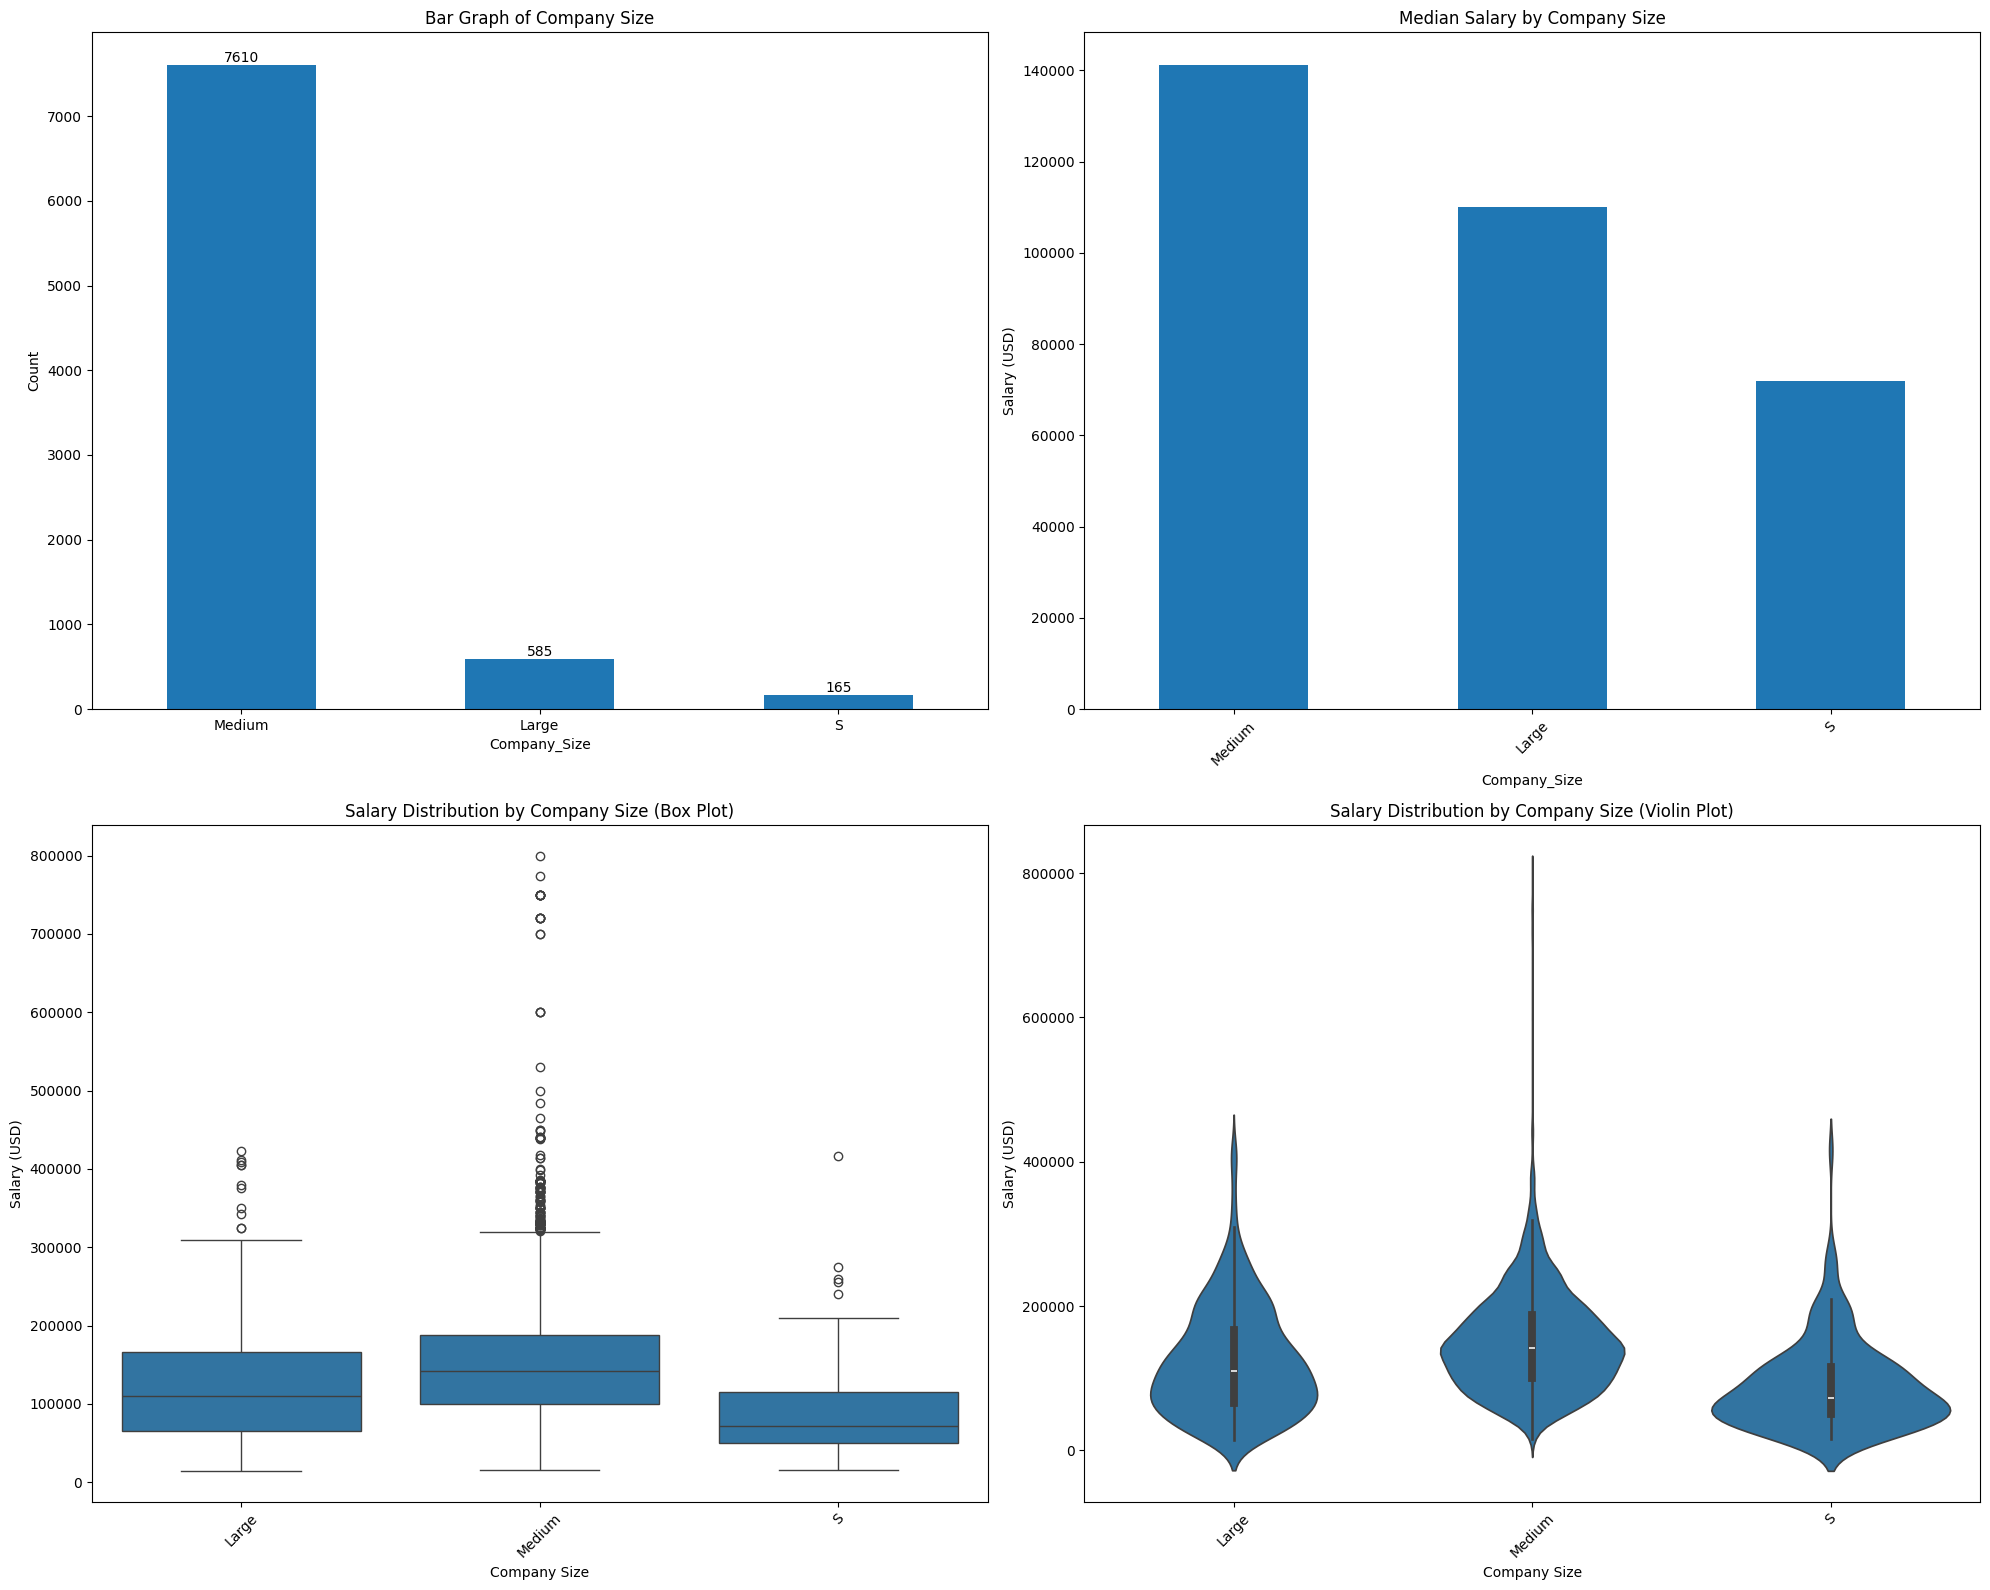

In [ ]:
do_eda_on_variable(df, 'Company_Size', 'Company Size')

we can see the number of companies with medium size is more than others . because of that we can see more outliers . and medium companies have wider distribution in salary among others. 

## Salary

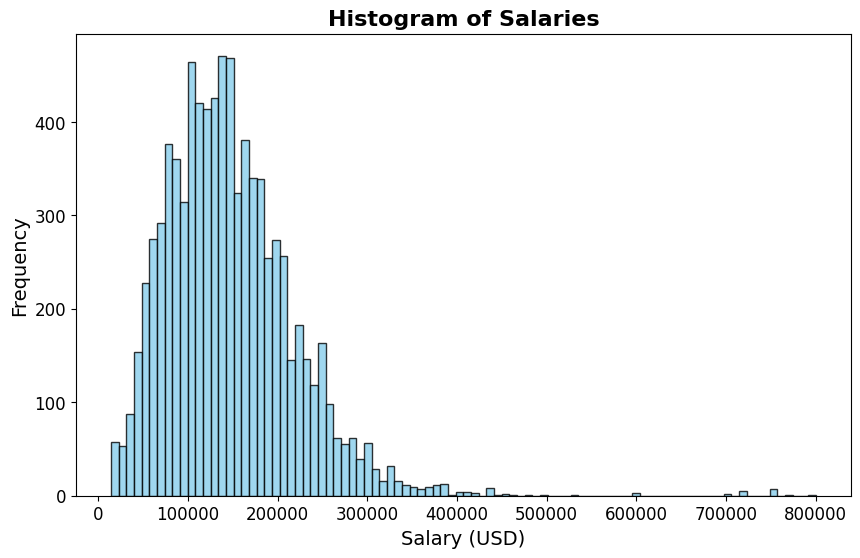

In [ ]:
import matplotlib.pyplot as plt

bins = int(np.ceil(np.sqrt(len(df))))
plt.figure(figsize=(10, 6))
plt.hist(df["Salary_USD"], bins=bins, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel('Salary (USD)', fontsize=14) 
plt.ylabel('Frequency', fontsize=14)  
plt.title('Histogram of Salaries', fontsize=16, fontweight='bold') 
plt.tick_params(axis='both', labelsize=12)  
plt.show()

Here we have distribution of salary . we can see we have skewness to right . even we can see there are some outliers.

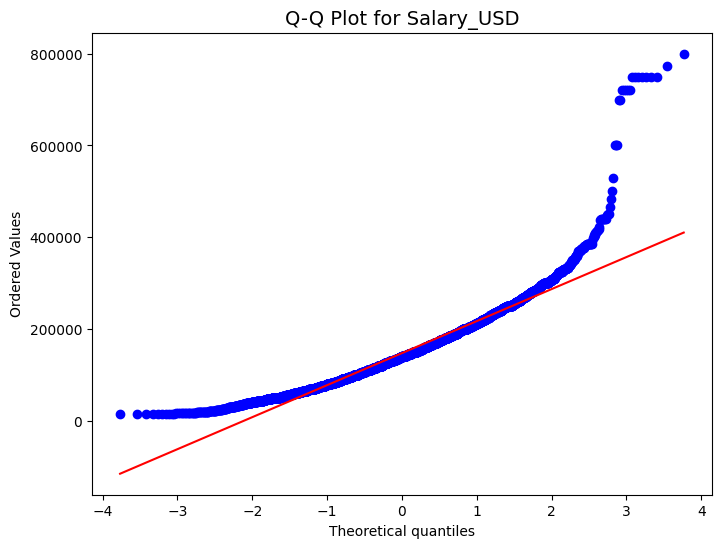

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Q-Q plot for Salary_USD
plt.figure(figsize=(8, 6))
stats.probplot(df["Salary_USD"], plot=plt)
plt.title("Q-Q Plot for Salary_USD", fontsize=14)
plt.show()

here we plot QQ_plot to see how much our distribution is near to normal.as we can see there are some points that made the distribution out of normal shape.

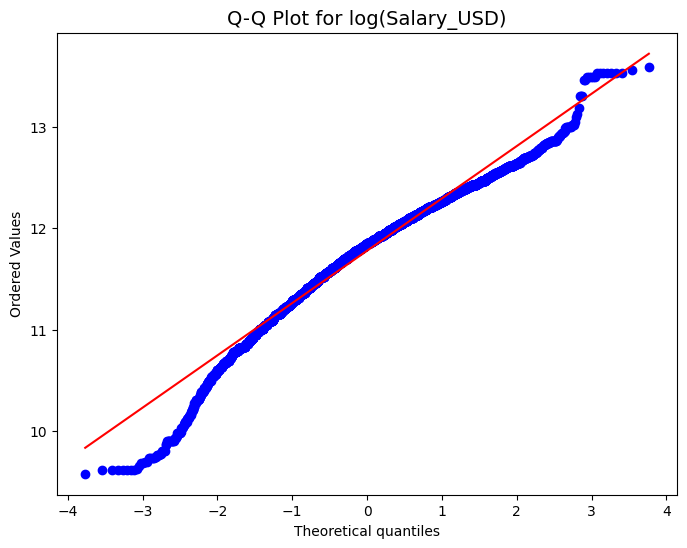

In [ ]:
# Q-Q plot for log(Salary_USD)
plt.figure(figsize=(8, 6))
stats.probplot(np.log(df["Salary_USD"]), plot=plt)
plt.title("Q-Q Plot for log(Salary_USD)", fontsize=14)
plt.show()

so we used log for making it better . as we can see here we can conclude that the skewness became less when we used log in ssalaries . (CLT)

C:\Users\ali18\AppData\Local\Temp\ipykernel_20652\2093230540.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='muted')
C:\Users\ali18\AppData\Local\Temp\ipykernel_20652\2093230540.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='muted')
C:\Users\ali18\AppData\Local\Temp\ipykernel_20652\2093230540.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='muted')


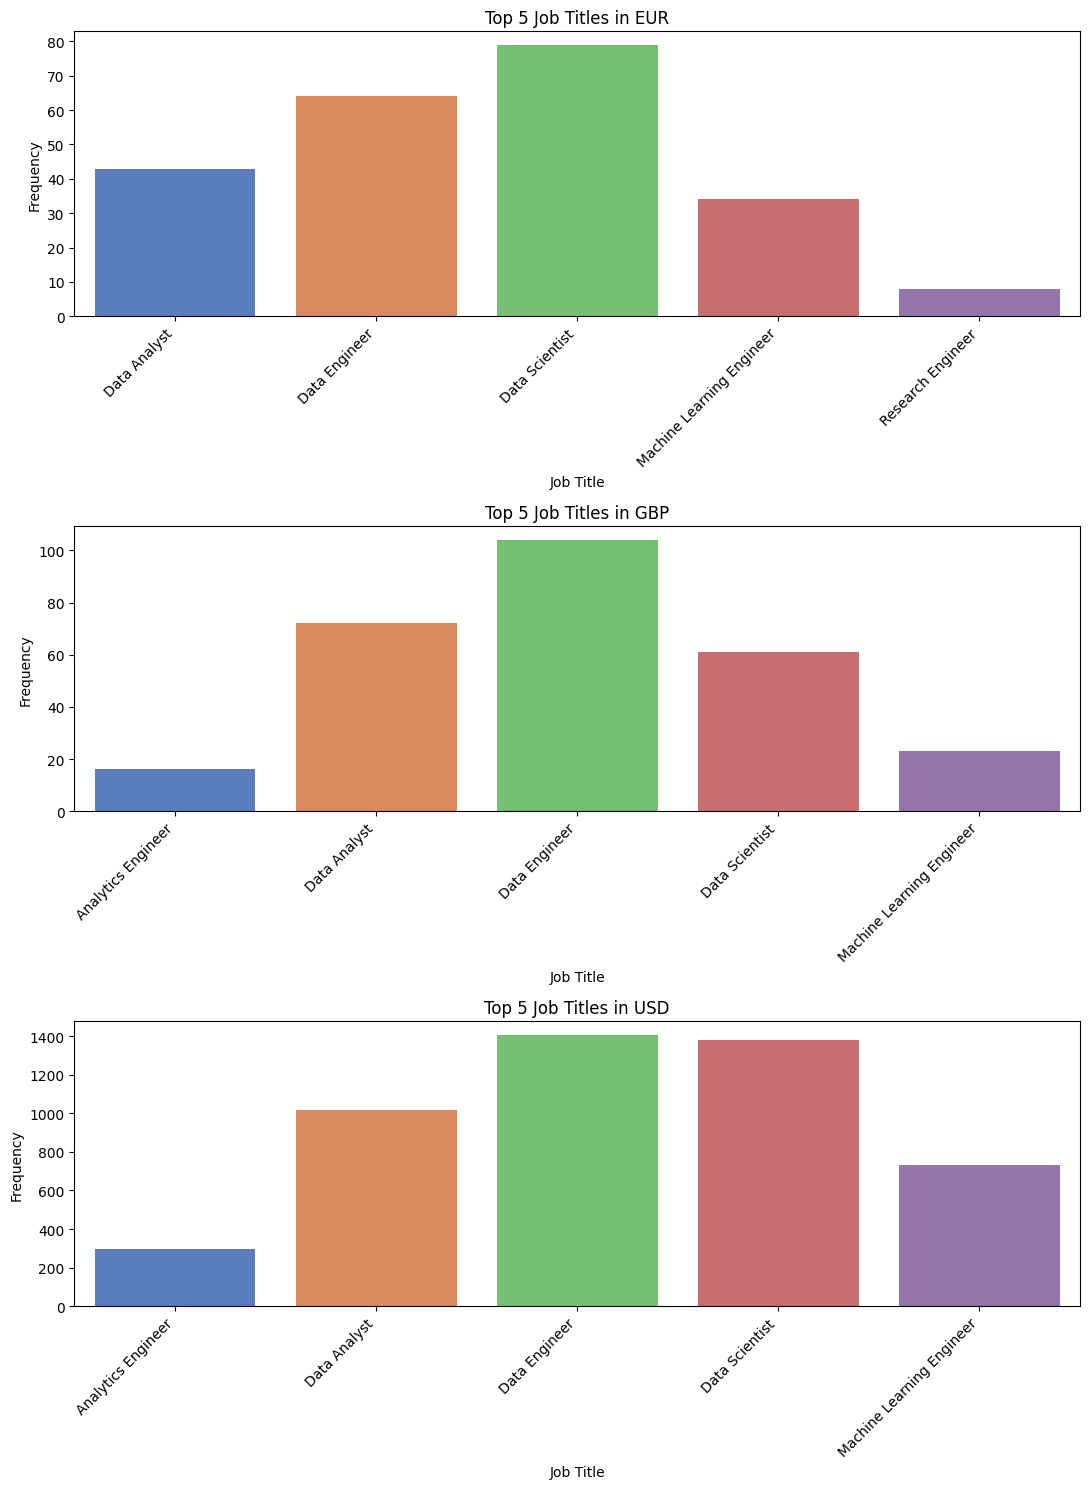

In [ ]:
import pandas as pd

# Get the top 3 currencies
top_3_currencies = df['Salary_Currency'].value_counts().head(3).index.tolist()

# Filter the DataFrame to include only the top 3 currencies
df = df[df['Salary_Currency'].isin(top_3_currencies)]

jobs_by_country = df.groupby('Salary_Currency')['Job_Title'].value_counts()

job_counts_by_country = jobs_by_country.unstack(level=-1)

top_5_job_titles_by_country = job_counts_by_country.apply(lambda x: x.nlargest(5), axis=1)

num_rows = len(top_5_job_titles_by_country)

plt.figure(figsize=(11, 5 * num_rows))

for i, (country, data) in enumerate(top_5_job_titles_by_country.iterrows(), start=1):
    plt.subplot(len(top_5_job_titles_by_country), 1, i)
    data = data.dropna()
    sns.barplot(x=data.index, y=data.values, palette='muted')
    plt.title(f'Top 5 Job Titles in {country}')
    plt.xlabel('Job Title')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

here we have plot 5 top job with highest frequencies considering the type of miney they are paied with. 

we can see that Data engineers are the most in three types (USD, GBP,EUR).

top ten jobs

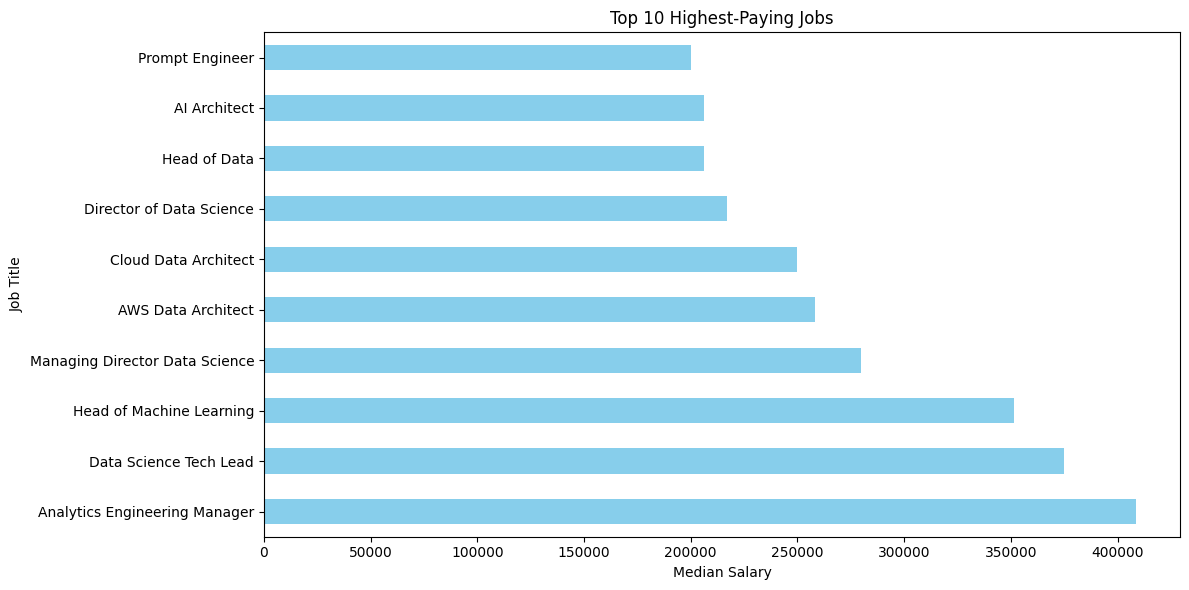

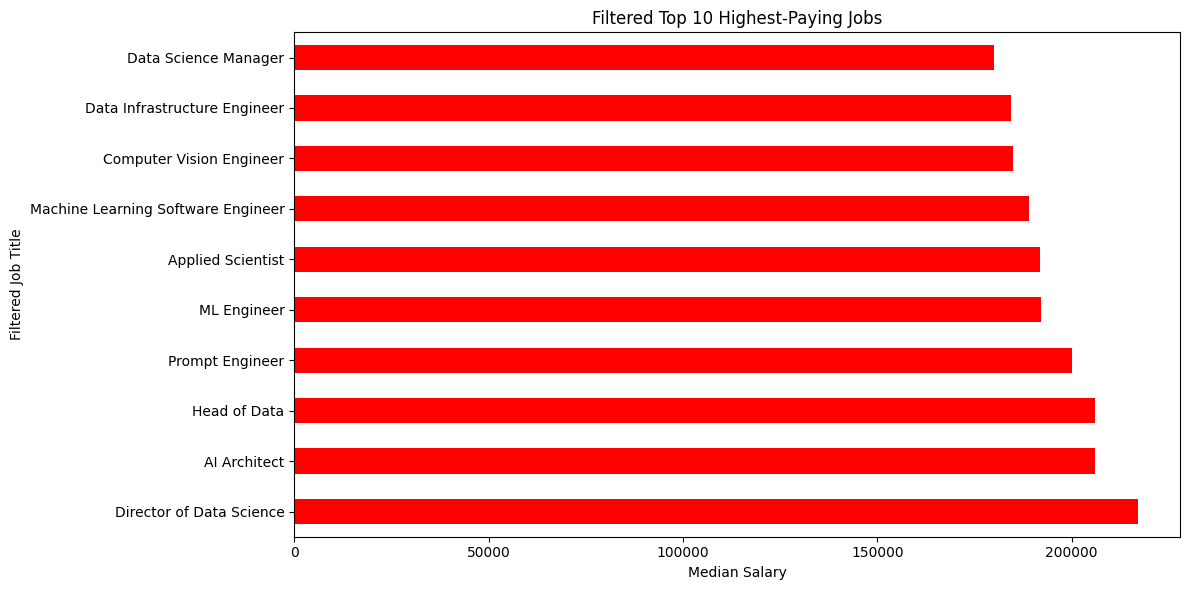

In [ ]:
job_counts = df['Job_Title'].value_counts()
valid_jobs = job_counts[job_counts >= 10].index
filtered_df = df[df['Job_Title'].isin(valid_jobs)]

filtered_median_salary_by_job = filtered_df.groupby('Job_Title')['Salary_USD'].median()
filtered_highest_paying_jobs = filtered_median_salary_by_job.sort_values(ascending=False)

median_salary_by_job = df.groupby('Job_Title')['Salary_USD'].median()
highest_paying_jobs = median_salary_by_job.sort_values(ascending=False)

plt.figure(figsize=(12, 6))  # Increased horizontal size to 12 inches
highest_paying_jobs.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Highest-Paying Jobs')
plt.xlabel('Median Salary')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))  # Increased horizontal size to 12 inches
filtered_highest_paying_jobs.head(10).plot(kind='barh', color='red')
plt.title('Filtered Top 10 Highest-Paying Jobs')
plt.xlabel('Median Salary')
plt.ylabel('Filtered Job Title')
plt.tight_layout()
plt.show()

**Job Titles:** The graph lists various high-paying job titles such as “Prompt Engineer,” “AI Architect,” “Head of Data,” “Director of Data Science,” and others. These roles are likely in the technology sector, where specialized skills in data science, machine learning, and artificial intelligence are in high demand.

**Median Salaries:** The x-axis represents the median salaries for these job titles, with amounts ranging up to approximately $400,000. The graph shows that “Prompt Engineer” has the highest median salary among the listed jobs, followed by “AI Architect” and “Head of Data.”

The bar graph provides a ranking of job titles by median salary, which complements the salary distribution insights provided by the box and violin plots.
The heatmap that showed the proportions of experience levels across salary deciles can be related to this bar graph by indicating where these top-paying job titles might fall within those deciles.
Together, these visualizations offer a multi-dimensional view of the job market, highlighting not only the demand and compensation for specific roles but also the broader salary trends across different levels of experience and types of employment.


## EDA on salary outliers

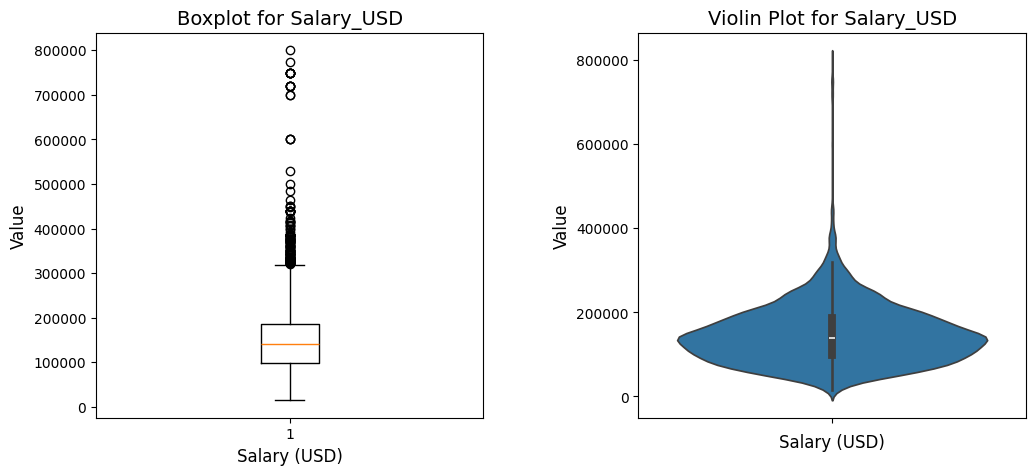

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Boxplot for Salary_USD
ax1.boxplot(df["Salary_USD"])
ax1.set_title("Boxplot for Salary_USD", fontsize=14)
ax1.set_xlabel("Salary (USD)", fontsize=12)
ax1.set_ylabel("Value", fontsize=12)

# Violin plot for Salary_USD
sns.violinplot(y=df["Salary_USD"], ax=ax2)
ax2.set_title("Violin Plot for Salary_USD", fontsize=14)
ax2.set_xlabel("Salary (USD)", fontsize=12)
ax2.set_ylabel("Value", fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()

Here we want to use EDA in outliers . because we know that outliers are important in our dataset.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the quartiles and whiskers for Salary_USD
q1, q3 = np.percentile(df["Salary_USD"], [25, 75])
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr

# Get records above the upper whisker
above_upper_whisker = df[df["Salary_USD"] > upper_whisker]

print("Records above the upper whisker:")
print(above_upper_whisker)

Records above the upper whisker:
       Work_Year Experience_Level Employment_Type  \
63          2024     Senior-Level       Full-Time   
65          2024     Senior-Level       Full-Time   
73          2024     Senior-Level       Full-Time   
103         2024  Executive-Level       Full-Time   
129         2024     Senior-Level       Full-Time   
...          ...              ...             ...   
13754       2020        Mid-Level       Full-Time   
13899       2021  Executive-Level        Contract   
13918       2020  Executive-Level       Full-Time   
13964       2021        Mid-Level       Full-Time   
13967       2020     Senior-Level       Full-Time   

                                Job_Title  Salary Salary_Currency  \
63                     Research Scientist  600000             USD   
65                        Prompt Engineer  600000             USD   
73                     Research Scientist  500000             USD   
103                         Data Engineer  334075     

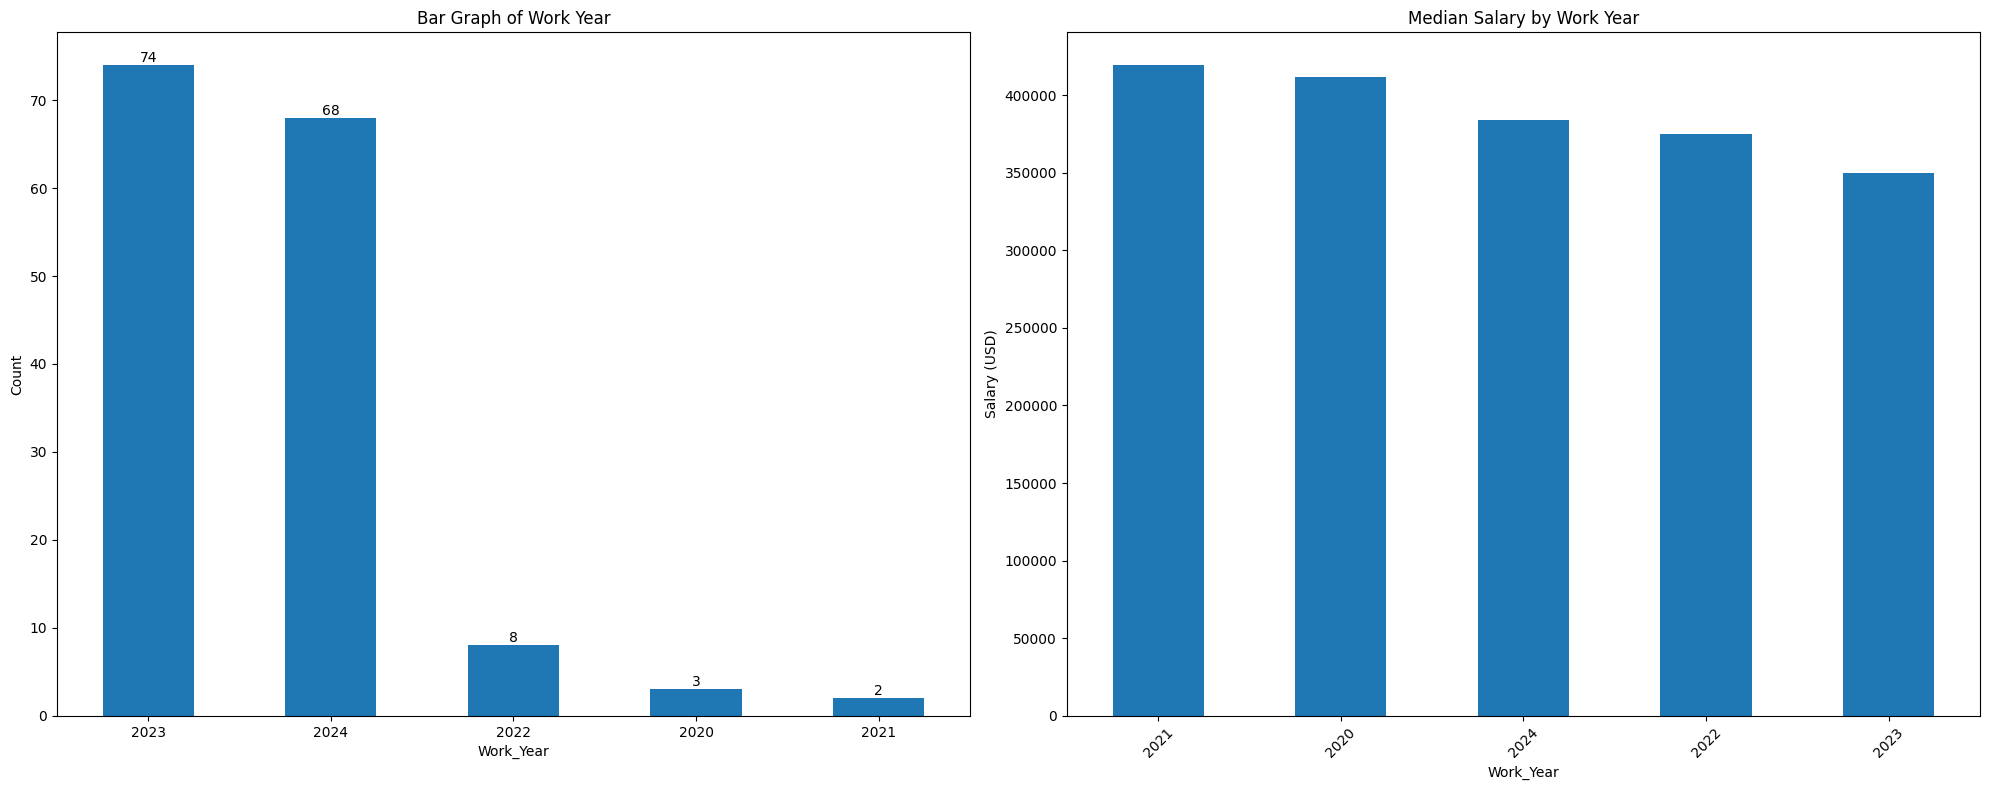

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Work_Year', 'Work Year', short_plot=True)

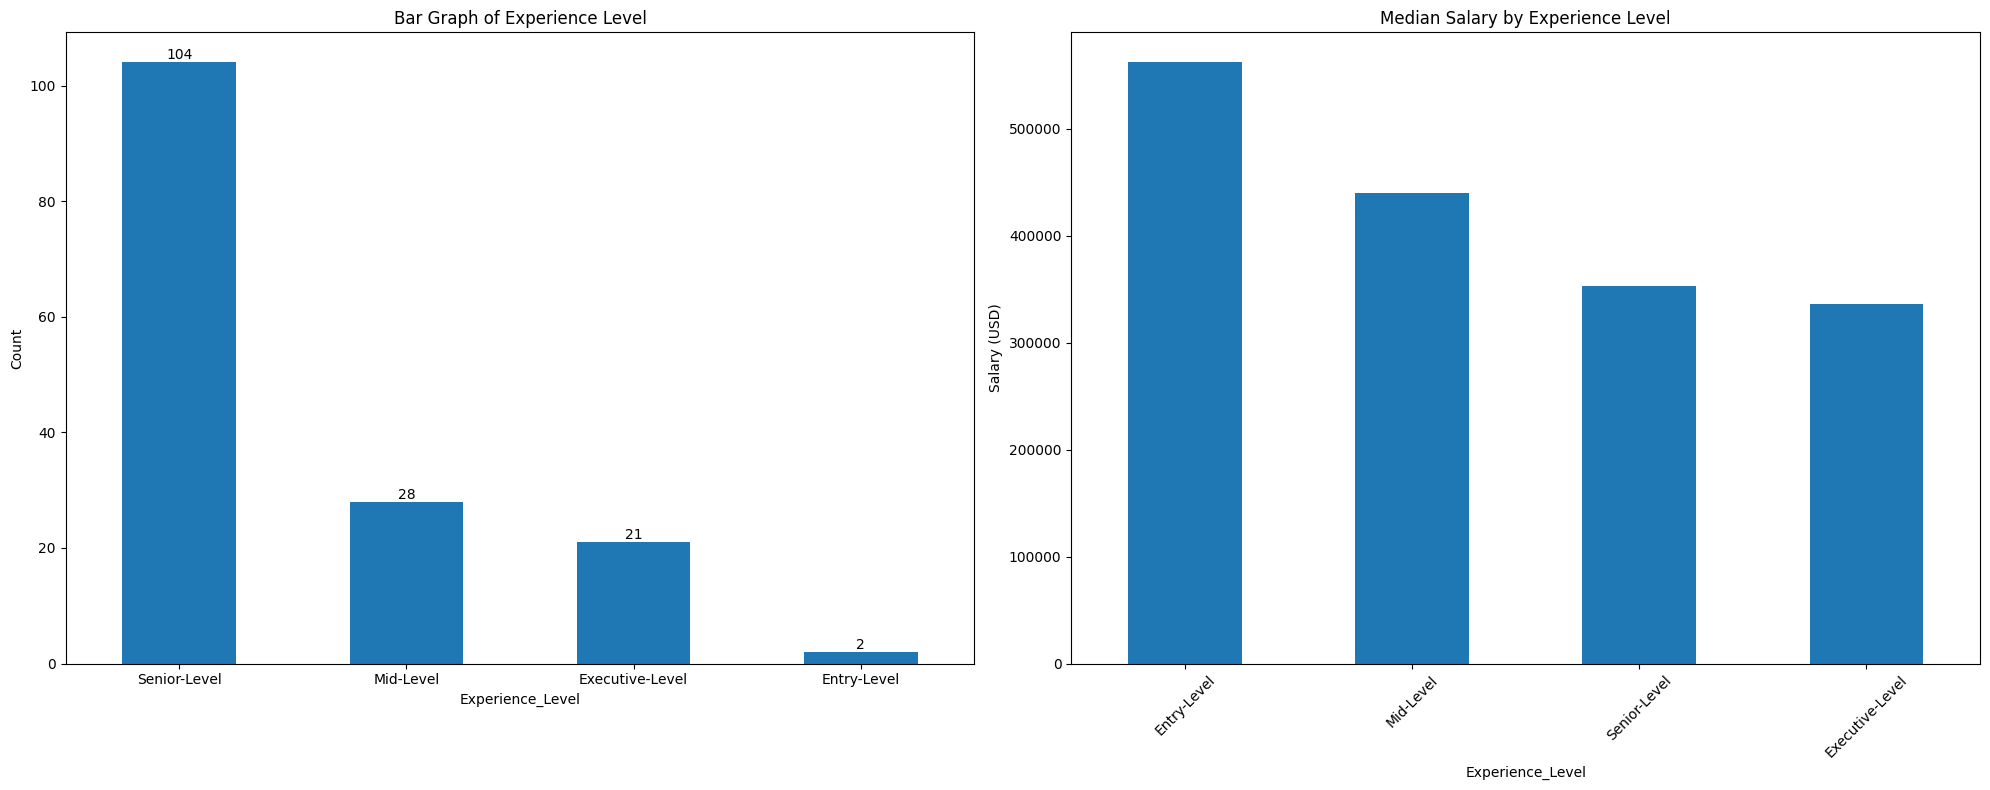

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Experience_Level', 'Experience Level', short_plot=True)

according to the original data we can see number of ouliers are the most in senior level , we ca see in original data that the count of senior was the most among others .

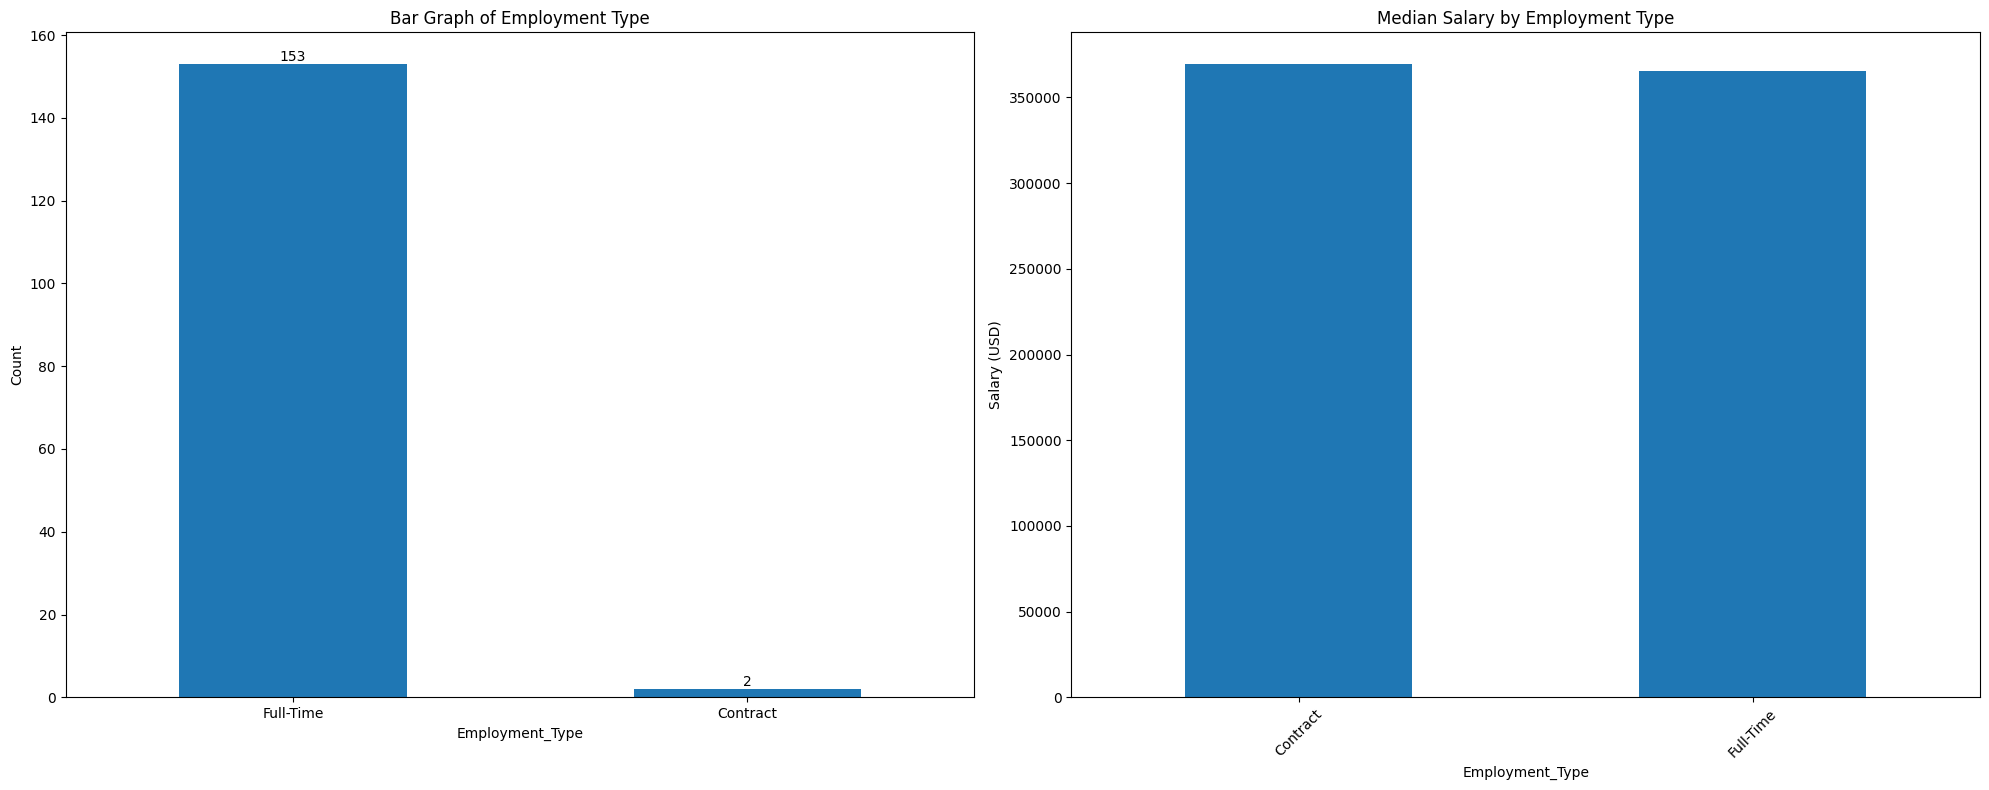

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Employment_Type', 'Employment Type', short_plot=True)

In [ ]:
top_10_jobs_above_upper_whisker = above_upper_whisker[above_upper_whisker['Job_Title'].isin(list(above_upper_whisker['Job_Title'].value_counts().sort_values(ascending=True).nlargest(10).index))]

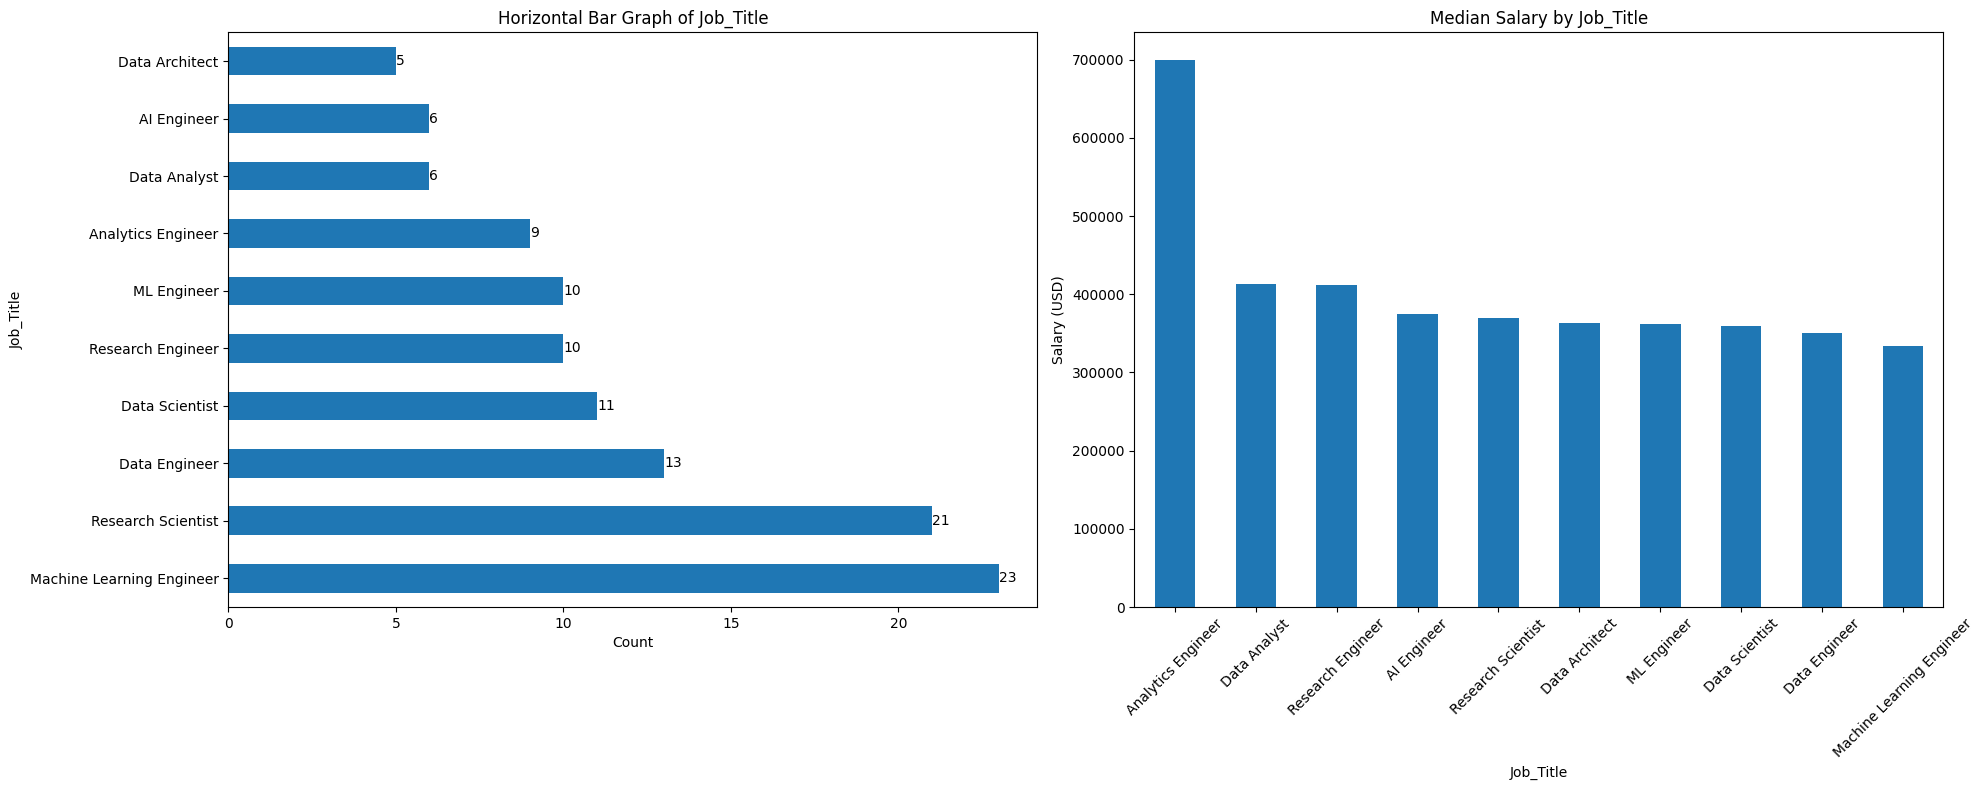

In [ ]:
do_eda_on_variable(top_10_jobs_above_upper_whisker, 'Job_Title', 'Job_Title', short_plot=True, horizonal=True)

considering the original data we can undrestand that the number of outliers in machine learning is more than others . because totaly it was more than other groupes in our dataset. but we can not work on median . for example for analytics engineer , there are  not few of them in the group of jop outliers. but we know that median is good when we have large amount of that group

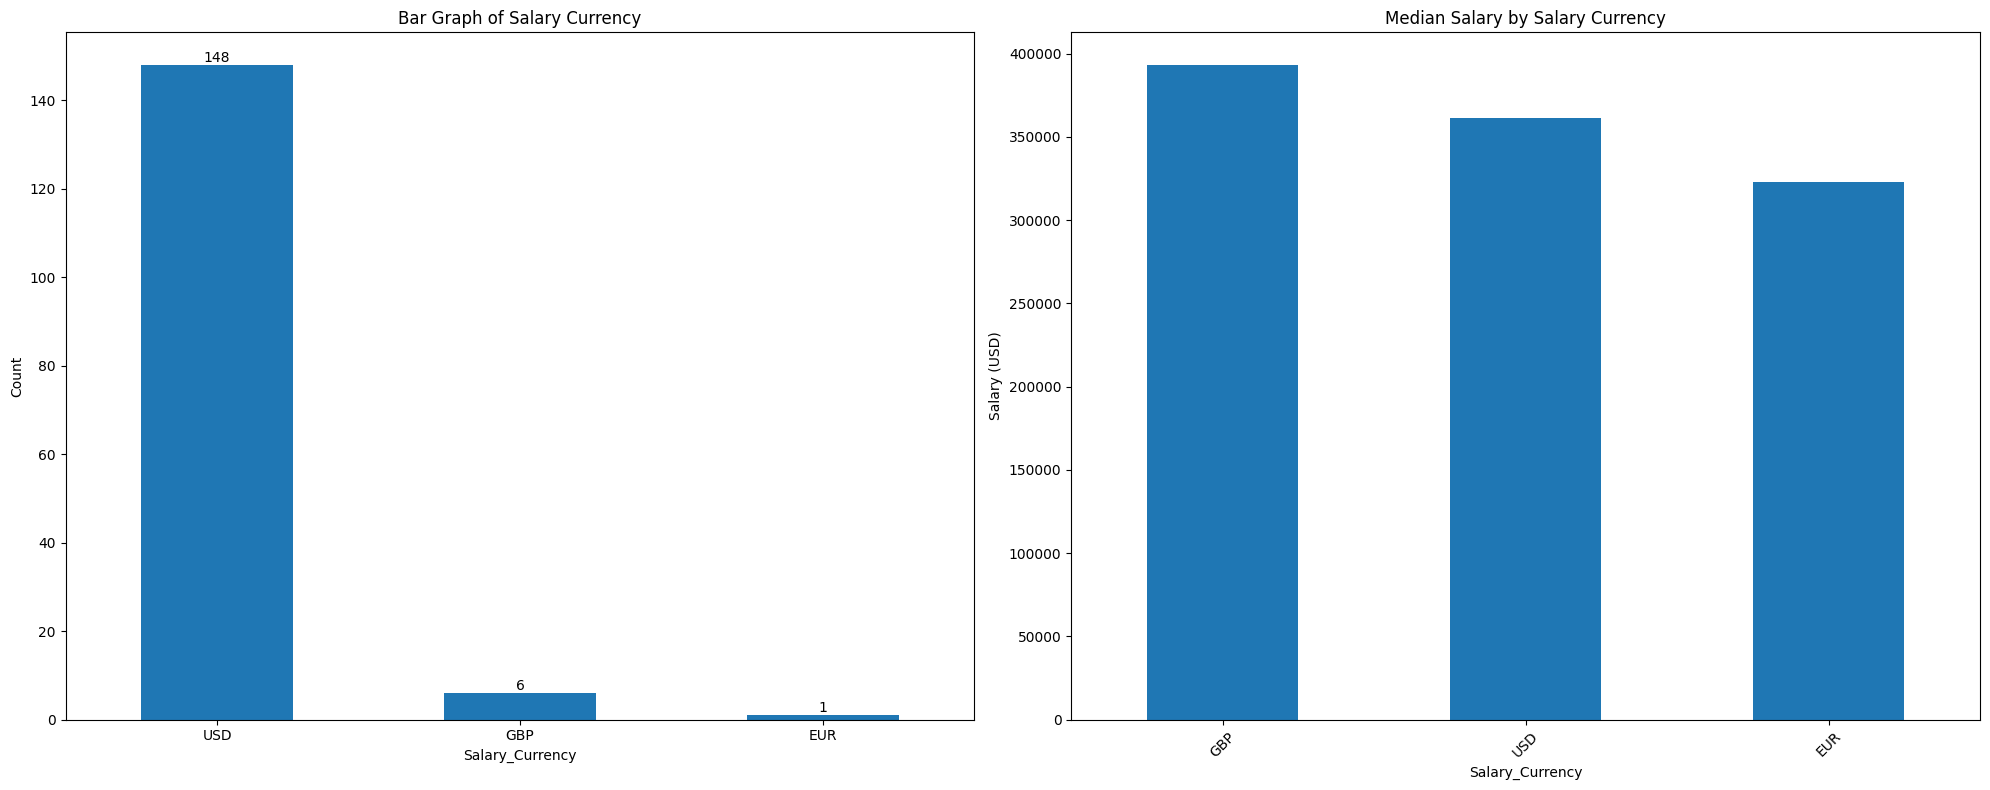

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Salary_Currency', 'Salary Currency', short_plot=True)

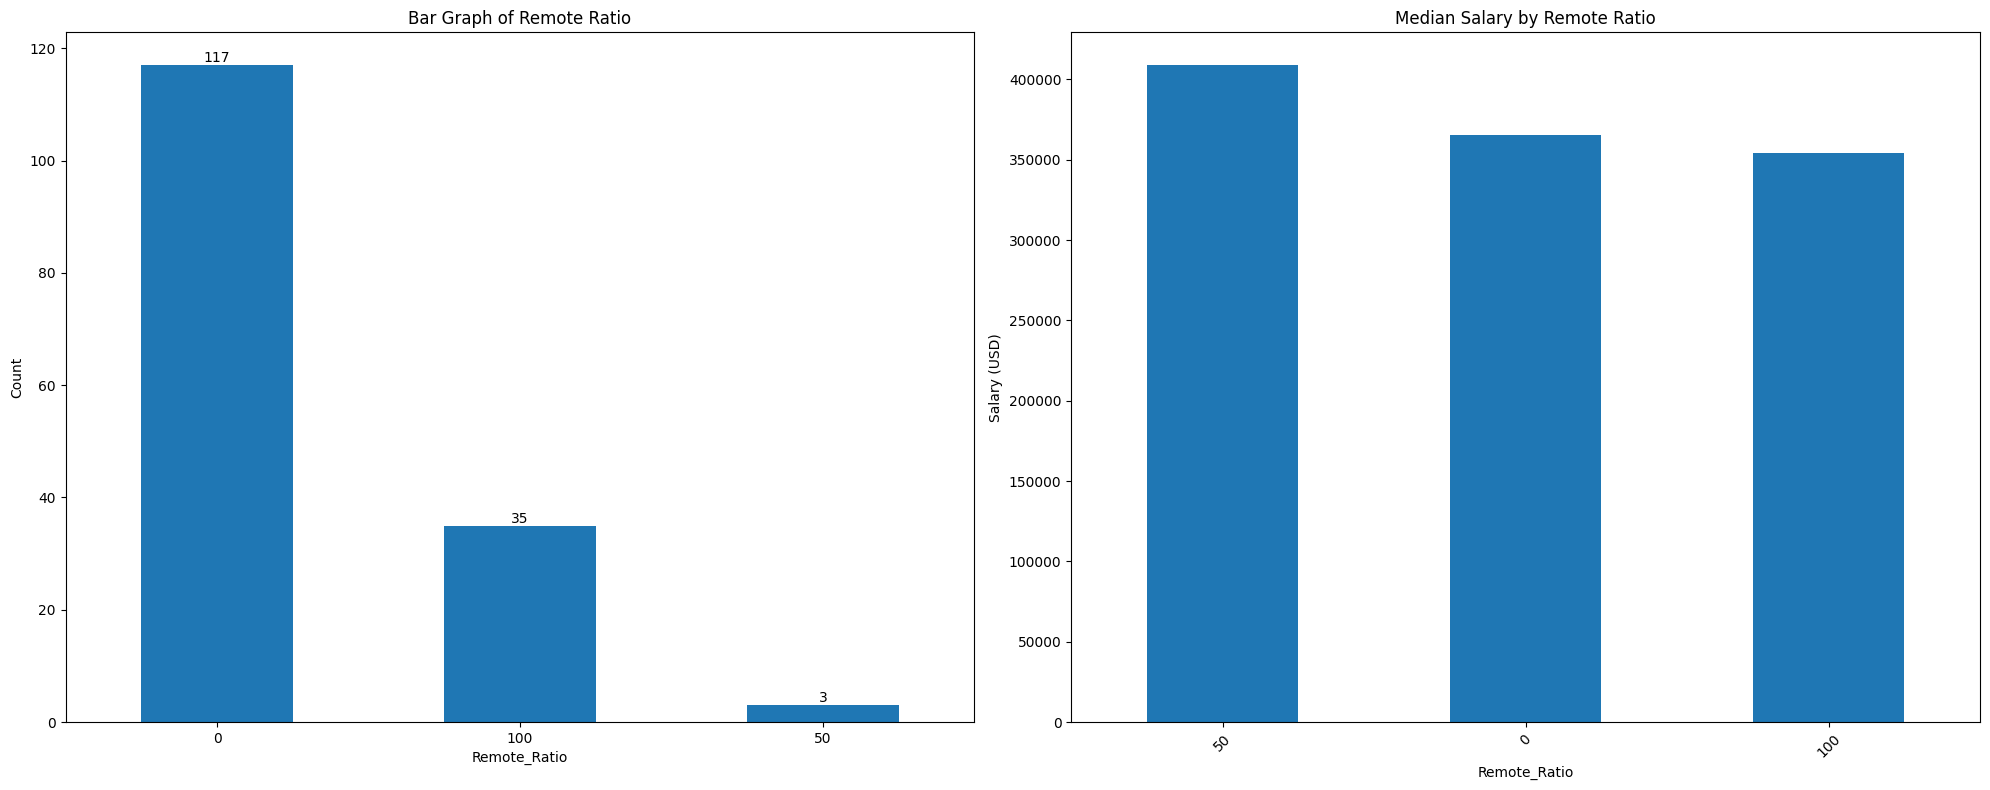

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Remote_Ratio', 'Remote Ratio', short_plot=True)

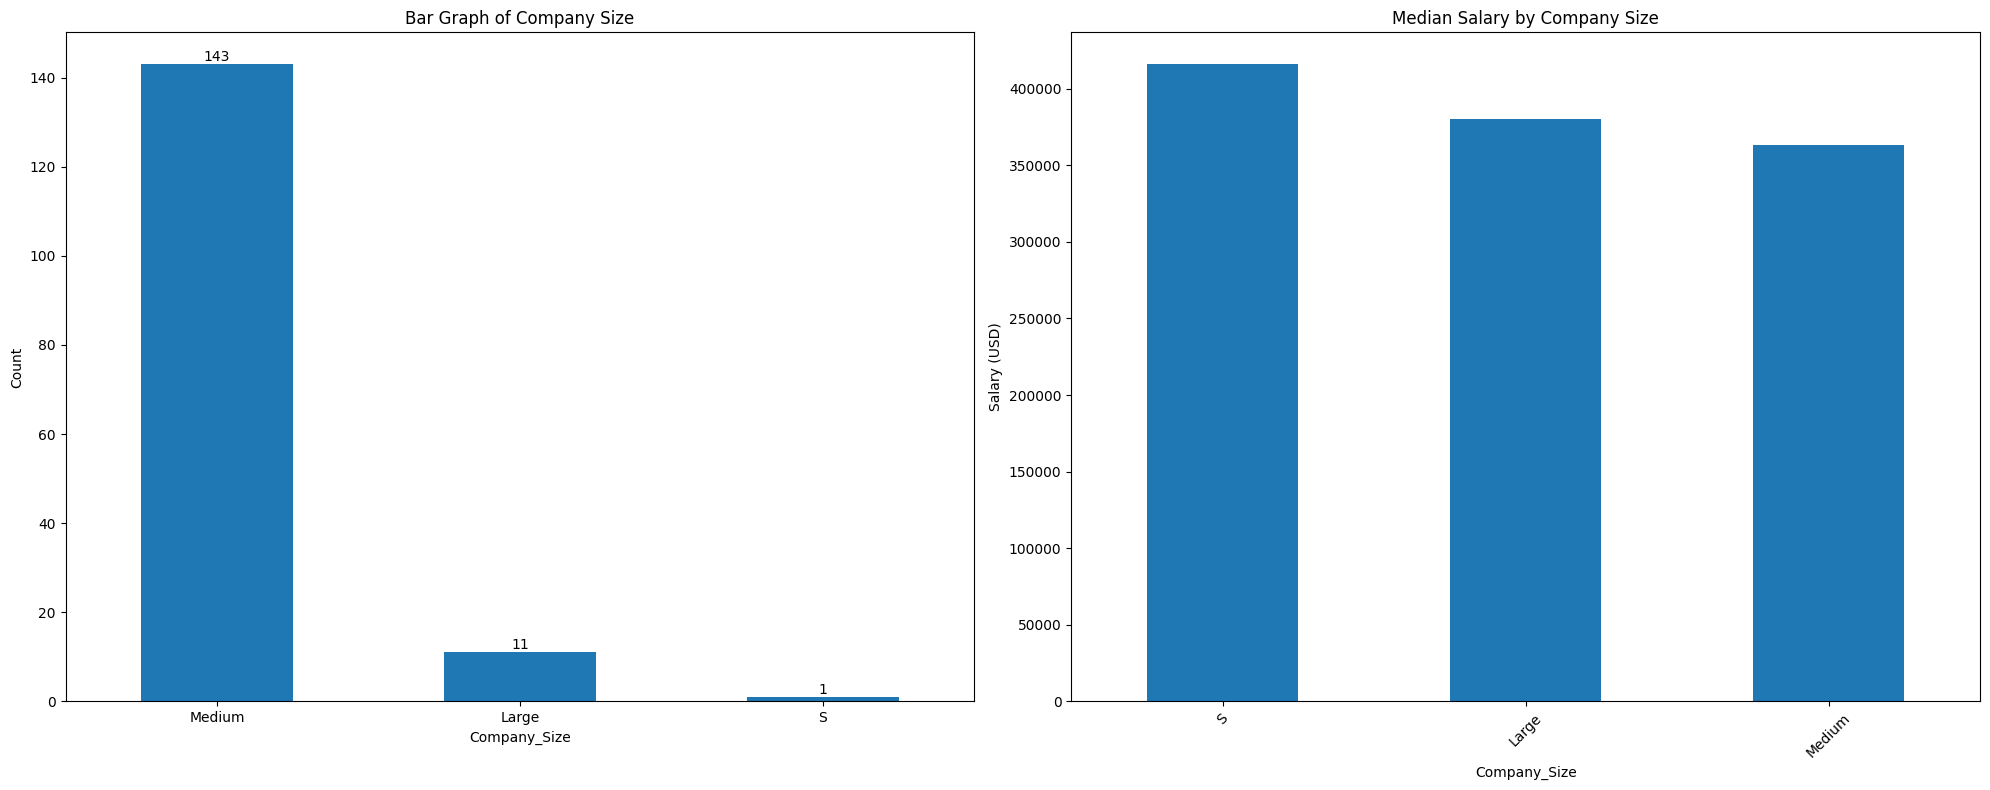

In [ ]:
do_eda_on_variable(above_upper_whisker, 'Company_Size', 'Company Size', short_plot=True)